In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, auc
from sklearn.metrics import recall_score, make_scorer
from pyod.utils.data import evaluate_print
from tensorflow.keras import layers, losses
from sklearn.metrics import mean_squared_error

# Feature Selection and Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import kerastuner as kt
from kerastuner import Objective, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

#saving the model for streamlit
import pickle

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Loading the Dataset

In [8]:
df = pd.read_excel(r'C:\Users\l.baltaji\Desktop\Capstone Project\Methodology and Source Code\Tickets Table Plus Synthesized Anomalies.xlsx')

In [9]:
df.head()

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,CashSettlementDate,ShareSettlementDate,LocalValueRate,LocalEquivalent,CreationDate,Anomaly,Anomaly Type
0,12,1662,953,3910,7,1302,0,454,454,0,454,1525.713,1235.779,1365.730,0.000,300.0,0.0,0,0.0,7,1885143.450,2022-12-30,2022-12-30,0.306,576945.890141,2023-01-01 14:06:00,0,0
1,12,1662,954,1885,0,15,17,206,206,0,465,37809.000,0.152,0.245,8.800,0.0,1.0,0,0.0,91,5737.168,2023-01-05,2023-01-02,1.000,5746.968000,2023-01-02 13:00:00,0,0
2,11,1662,954,1930,0,15,17,206,206,0,465,100000.000,0.058,0.042,8.626,0.0,1.0,0,0.0,91,5759.626,2023-01-05,2023-01-02,1.000,5800.000000,2023-01-02 13:00:00,0,0
3,11,1662,954,1930,0,15,17,206,206,0,465,1850000.000,0.057,0.042,159.009,0.0,17.0,0,0.0,91,106181.009,2023-01-05,2023-01-02,1.000,105450.000000,2023-01-02 13:00:00,0,0
4,11,1662,954,1930,0,15,17,206,206,0,465,500000.000,0.058,0.042,43.200,0.0,6.0,0,0.0,91,28849.200,2023-01-05,2023-01-02,1.000,29000.000000,2023-01-02 13:00:00,0,0


___
# 1 Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14471 entries, 0 to 14470
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TypeId                   14471 non-null  int64         
 1   SubTypeId                14471 non-null  int64         
 2   MethodId                 14471 non-null  int64         
 3   HoldingId                14471 non-null  int64         
 4   ClientId                 14471 non-null  int64         
 5   ProductId                14471 non-null  int64         
 6   BrokerId                 14471 non-null  int64         
 7   TradingAccountId         14471 non-null  int64         
 8   ShareAccountId           14471 non-null  int64         
 9   CashBankAccountId        14471 non-null  int64         
 10  CashThirdPartyAccountId  14471 non-null  int64         
 11  Quantity                 14471 non-null  float64       
 12  UnitPrice                14471 n

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TypeId,14471.0,11.476954,5.023830e-01,5.000,11.000,11.000,12.0000,1.200000e+01
SubTypeId,14471.0,1257.781356,9.409132e+02,0.000,0.000,1662.000,1662.0000,7.127000e+03
MethodId,14471.0,953.951627,2.145597e-01,953.000,954.000,954.000,954.0000,9.540000e+02
HoldingId,14471.0,2822.841752,1.386465e+03,1536.000,1896.000,2045.000,3553.0000,5.415000e+03
ClientId,14471.0,176.068136,9.143411e+02,0.000,0.000,0.000,0.0000,5.954000e+03
ProductId,14471.0,1719.695183,4.561344e+02,15.000,1782.000,1782.000,1950.0000,2.138000e+03
BrokerId,14471.0,10.602654,1.489776e+01,0.000,3.000,3.000,17.0000,7.500000e+01
TradingAccountId,14471.0,443.313454,1.765530e+02,1.000,366.000,539.000,539.0000,5.750000e+02
ShareAccountId,14471.0,443.312211,1.765531e+02,1.000,366.000,539.000,539.0000,5.750000e+02
CashBankAccountId,14471.0,31.008914,1.236461e+02,0.000,0.000,0.000,0.0000,5.530000e+02


## Checking for missing values

In [12]:
print('Number of missing values for each field:')
df.isnull().sum()

Number of missing values for each field:


TypeId                     0
SubTypeId                  0
MethodId                   0
HoldingId                  0
ClientId                   0
ProductId                  0
BrokerId                   0
TradingAccountId           0
ShareAccountId             0
CashBankAccountId          0
CashThirdPartyAccountId    0
Quantity                   0
UnitPrice                  0
AVGCost                    0
ExchangeFees               0
BrokerageFees              0
TicketCharges              0
SettlementFees             0
OtherFees                  0
ValueCurrencyId            0
ValueAmount                0
CashSettlementDate         0
ShareSettlementDate        0
LocalValueRate             0
LocalEquivalent            0
CreationDate               0
Anomaly                    0
Anomaly Type               0
dtype: int64

No null values exist in the dataset

## Checking for duplicates

In [13]:
# find duplicates
dups = df.duplicated()
print(f"There are {dups.sum()} duplicate rows.")

There are 35 duplicate rows.


In [14]:
# Let's remove the duplicated rows as they will add redundancy and noise to out data
df = df.drop_duplicates(keep = 'first')

In [15]:
df.shape

(14436, 28)

## Plotting the target variable

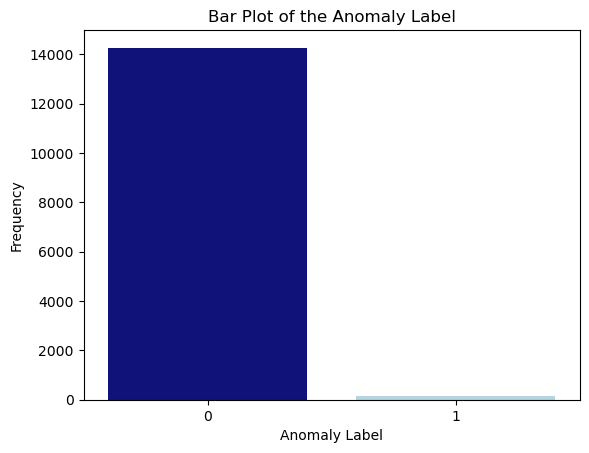

In [16]:
anomaly_counts = df['Anomaly'].value_counts()

custom_palette = ["lightblue" if count < max(anomaly_counts) else "darkblue" for count in anomaly_counts]

sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values,  palette=custom_palette)
plt.xlabel('Anomaly Label')
plt.ylabel('Frequency')
plt.title('Bar Plot of the Anomaly Label')
plt.show()

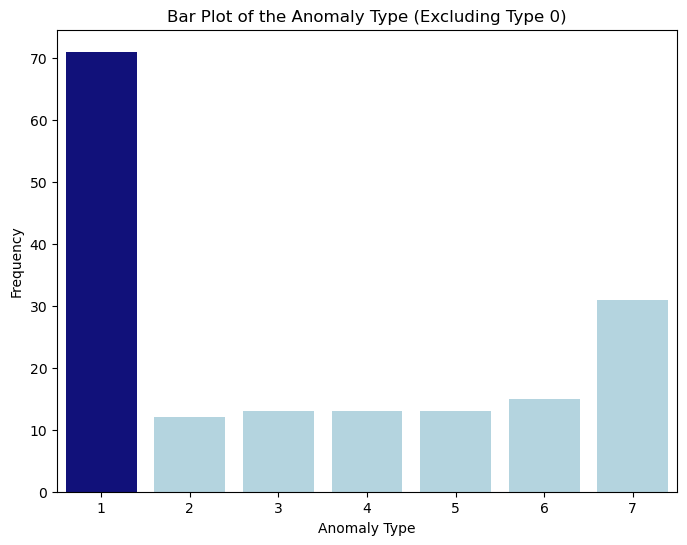

In [17]:
anomaly_type_counts = df['Anomaly Type'].value_counts()
anomaly_type_counts = anomaly_type_counts[anomaly_type_counts.index!=0].sort_values(ascending = False)

custom_palette = ["lightblue" if count < max(anomaly_type_counts) else "darkblue" for count in anomaly_type_counts]
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_type_counts.index, y=anomaly_type_counts.values,  palette=custom_palette)
plt.xlabel('Anomaly Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of the Anomaly Type (Excluding Type 0)')
sns.set_palette("coolwarm")
plt.show()

In [18]:
anomaly_type_counts

1    71
7    31
6    15
5    13
3    13
4    13
2    12
Name: Anomaly Type, dtype: int64

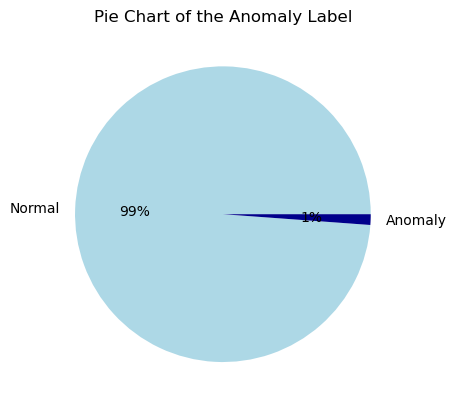

In [19]:
custom_palette = ["lightblue" if count == max(anomaly_counts) else "darkblue" for count in anomaly_counts]
sns.set_palette(custom_palette)
plt.pie(anomaly_counts, labels= ["Normal", "Anomaly"], autopct='%.00f%%')
plt.title('Pie Chart of the Anomaly Label')
plt.show()

Our target variable is imbalanced with only 1% of the transactions being anomalous

### Checking the distribution of numerical variables

In [20]:
sns.set_palette('coolwarm')

In [21]:
numerical = ['Quantity', 'UnitPrice', 'AVGCost', 'ExchangeFees', 'BrokerageFees', 'TicketCharges','SettlementFees', 'OtherFees',
            'ValueAmount', 'LocalValueRate', 'LocalEquivalent']             
categorical = ['TypeId', 'SubTypeId', 'MethodId', 'HoldingId', 'ClientId', 'ProductId','BrokerId', 'TradingAccountId', 
               'ShareAccountId', 'CashBankAccountId','CashThirdPartyAccountId', 'ValueCurrencyId', 'SettlementCurrencyId']
datetime = ['CashSettlementDate', 'ShareSettlementDate', 'CreationDate']

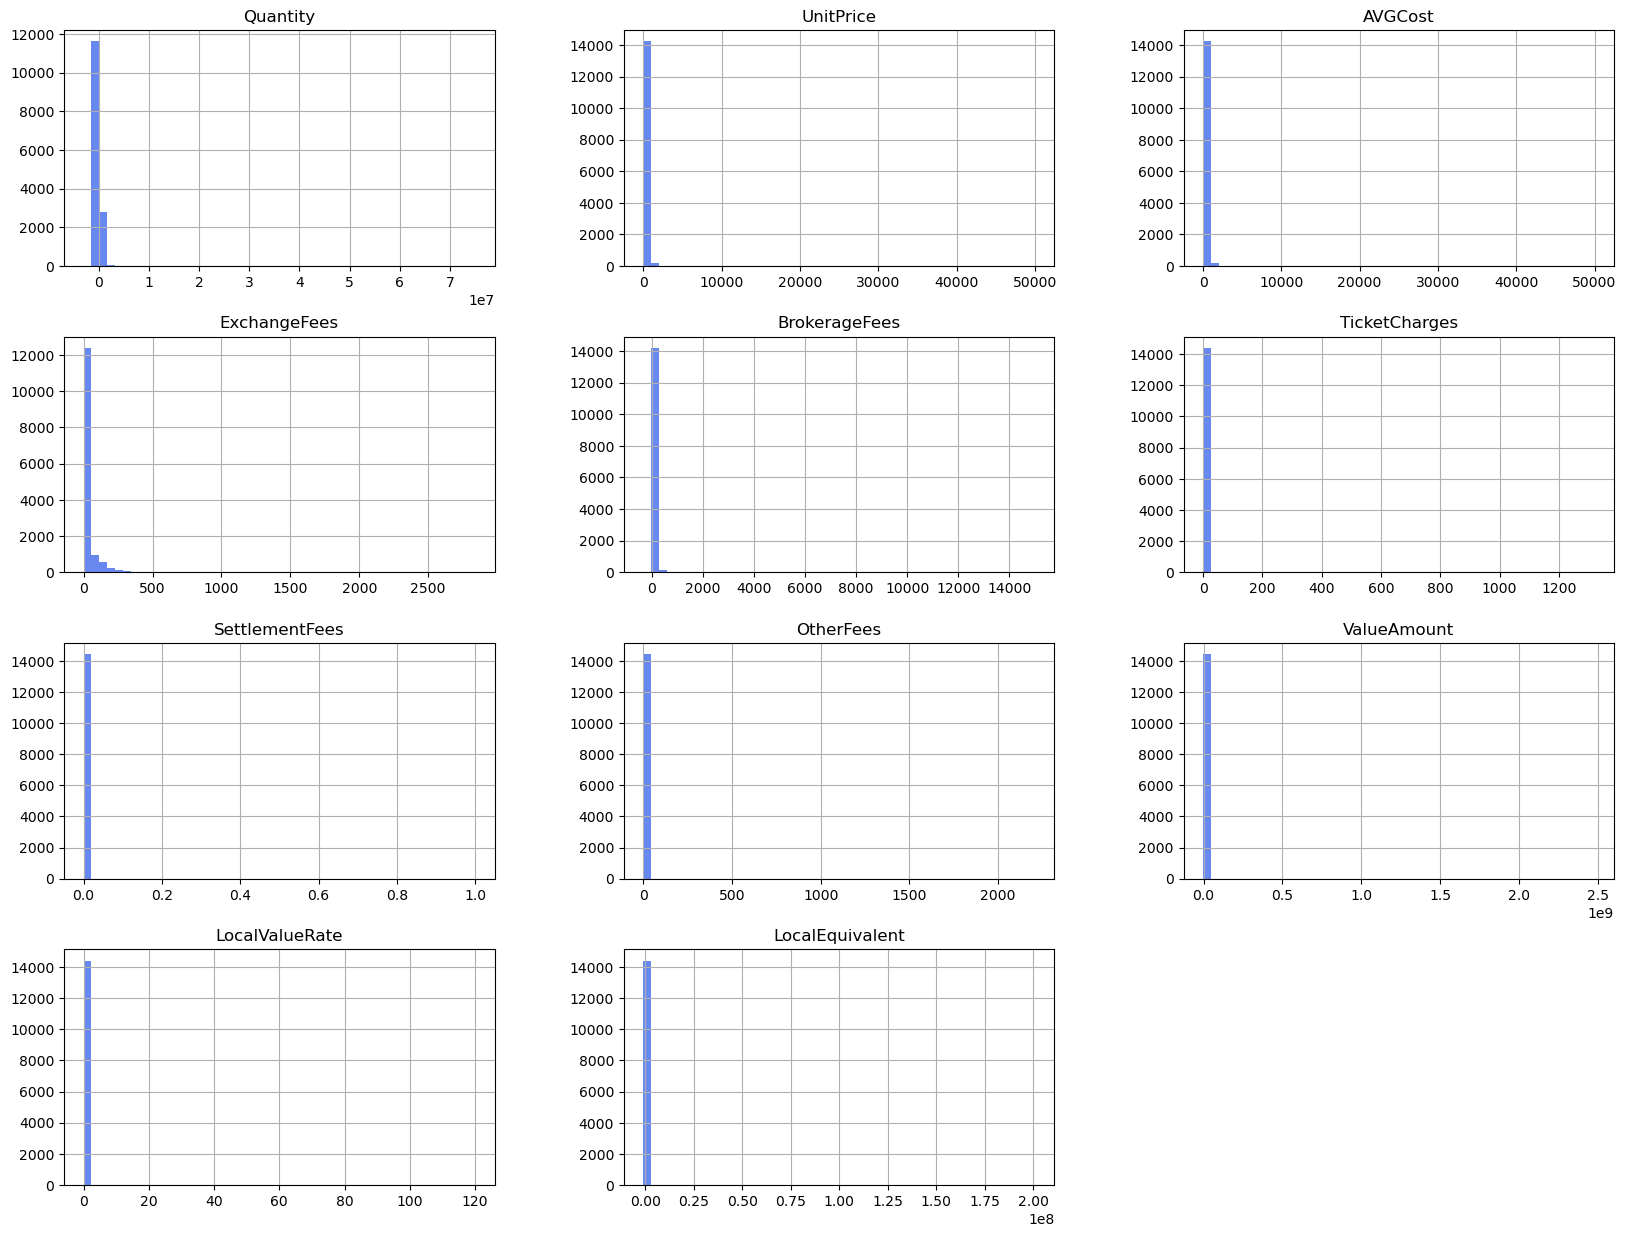

In [22]:
df[numerical].hist(bins=50, figsize=(20,15))
plt.show()

None of the variables is normally distributed

## Analyzing Relationships

In [23]:
corr = df.corr()

In [24]:
corr["Anomaly"].sort_values(ascending=False)

Anomaly                    1.000000
Anomaly Type               0.807905
Quantity                   0.264760
TicketCharges              0.242033
LocalEquivalent            0.200091
LocalValueRate             0.176893
ValueAmount                0.087306
ClientId                   0.068027
BrokerageFees              0.018582
ShareAccountId             0.014779
TradingAccountId           0.014779
UnitPrice                  0.012226
AVGCost                    0.007672
BrokerId                   0.006670
ProductId                  0.006197
HoldingId                  0.004557
SettlementFees            -0.000903
OtherFees                 -0.000948
ExchangeFees              -0.001096
TypeId                    -0.001296
CashThirdPartyAccountId   -0.006165
CashBankAccountId         -0.006725
SubTypeId                 -0.008309
ValueCurrencyId           -0.020193
MethodId                  -0.098893
Name: Anomaly, dtype: float64

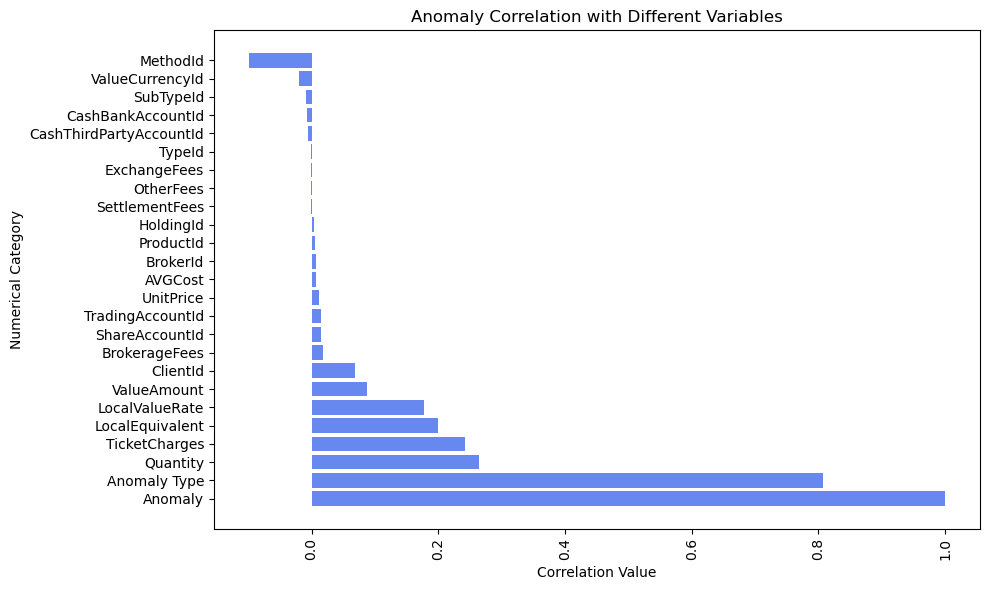

In [25]:
sorted_anomaly = corr["Anomaly"].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Numerical Category")
plt.title("Anomaly Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

In [26]:
corr['Anomaly Type'].sort_values(ascending = False)

Anomaly Type               1.000000
Anomaly                    0.807905
Quantity                   0.388785
LocalEquivalent            0.236794
TicketCharges              0.235784
LocalValueRate             0.220487
ValueAmount                0.123054
ClientId                   0.035980
SubTypeId                  0.018388
UnitPrice                  0.014569
ShareAccountId             0.013079
TradingAccountId           0.013078
TypeId                     0.012904
AVGCost                    0.009855
ProductId                  0.006719
SettlementFees            -0.000730
OtherFees                 -0.000766
BrokerageFees             -0.001930
CashBankAccountId         -0.002008
HoldingId                 -0.003631
CashThirdPartyAccountId   -0.010534
BrokerId                  -0.010560
ExchangeFees              -0.011332
ValueCurrencyId           -0.034034
MethodId                  -0.057808
Name: Anomaly Type, dtype: float64

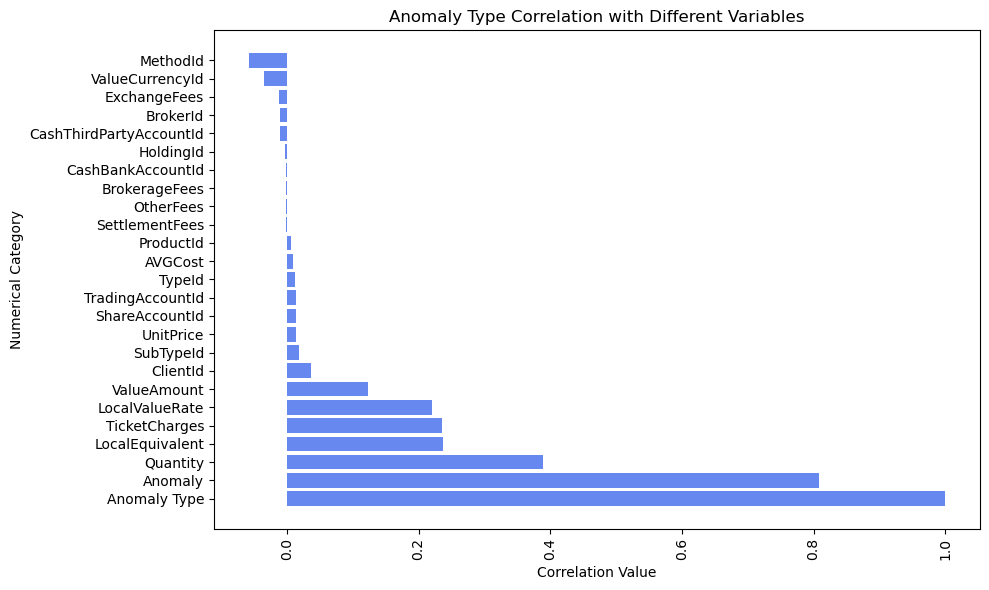

In [27]:
sorted_anomaly_type = corr["Anomaly Type"].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(sorted_anomaly_type.index, sorted_anomaly_type.values)
plt.xlabel("Correlation Value")
plt.ylabel("Numerical Category")
plt.title("Anomaly Type Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

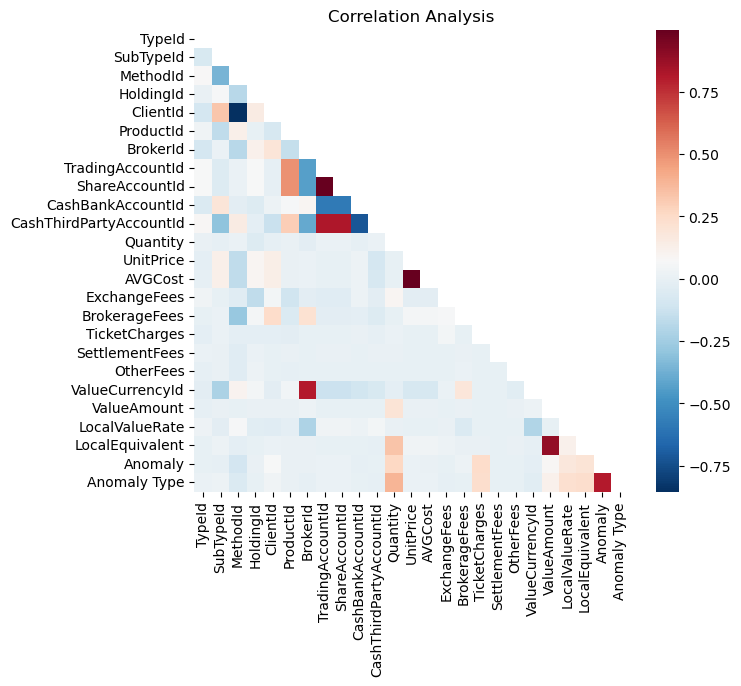

In [28]:
# Create the correlation matrix
corr = df.corr()

# Create a heatmap plot of the correlation matrix
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize=(7, 6))
ax = plt.axes()
sns.heatmap(corr,annot=False, mask=mask,lw=0,linecolor='white',fmt = "0.2f", cmap="RdBu_r")
plt.title('Correlation Analysis')
plt.axis('tight')
plt.show()

We can notice that there exists a high correlation between:

- ClientId and MethodId 
- ValueCurrencyId and BrokerId
- ShareAccountId and TradingAccountId
- CashBankAccountId and TradingAccountId
- CashThirdPartyAccountId and TradingAccountId
- CashThirdPartyAccountId and ShareAccountId
- CashThirdPartyAccountId and CashBankAccountId
- AVGCost and UnitPrice
- LocalValueRate and ValueCurrencyId
- LocalValueRate and SettlementCurrencyId
- LocalEquivalent and ValueAmount
- Anomaly and Anomaly Type


___
# 2 Baseline System

In this section, I will build a simple baseline system using Logistic Regression model and using only a subset of the features only (ignoring date and time features).

- Scaling numerical features using StandardScaler()
- Deploying the Logistic Regression model

In [29]:
df_subset = df.drop(datetime, axis = 1)

In [30]:
# Splitting the dataset into training and validation datasets
train, valid = train_test_split(df_subset, test_size = 0.3, random_state =  1, shuffle = True)

## Preprocessing Numerical Features

In [31]:
# Standardize the numerical data
scaler = StandardScaler()

In [32]:
# fit the scaler on the numerical columns
scaler.fit(train[numerical])

StandardScaler()

In [33]:
# Transform the numerical columns of the train and valid datasets
train[numerical] = scaler.transform(train[numerical])
valid[numerical] = scaler.transform(valid[numerical])

In [34]:
train[numerical]

,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueAmount,LocalValueRate,LocalEquivalent
8267,-0.090936,-0.052930,-0.052396,-0.390452,-0.133226,-0.053737,-0.009948,-0.010176,-0.012833,0.064689,-0.035734
616,-0.091528,-0.052376,-0.052092,-0.401381,-0.133226,-0.097519,-0.009948,-0.010176,-0.012893,0.064689,-0.036391
12254,-0.088542,-0.055502,-0.055450,-0.373555,-0.133226,-0.075628,-0.009948,-0.010176,-0.012821,0.064689,-0.035614
7813,-0.090120,-0.052870,-0.052365,-0.359533,-0.133226,-0.053737,-0.009948,-0.010176,-0.012747,0.064689,-0.034800
11303,0.318166,-0.055662,-0.055604,3.822274,-0.133226,0.055717,-0.009948,-0.010176,-0.005045,0.064689,0.048840
...,...,...,...,...,...,...,...,...,...,...,...
905,-0.090846,-0.055852,-0.055790,-0.407378,-0.133226,-0.075628,-0.009948,-0.010176,-0.012884,0.064689,-0.036294
5226,-0.050601,-0.055829,-0.055769,-0.101076,-0.133226,-0.009955,-0.009948,-0.010176,-0.012318,0.064689,-0.030129
12206,-0.088005,-0.055492,-0.055450,-0.366026,-0.133226,-0.075628,-0.009948,-0.010176,-0.012808,0.064689,-0.035462
235,0.014243,-0.056090,-0.056025,-0.175025,-0.133226,0.099499,-0.009948,-0.010176,-0.012242,0.064689,-0.029323


In [35]:
# Extract features and target variable
X_train = train.drop(columns=['Anomaly', 'Anomaly Type'])  # Features (excluding the target variable and anomaly type)
y_train = train['Anomaly']  # Target variable
X_valid = valid.drop(columns=['Anomaly', 'Anomaly Type'])  
y_valid = valid['Anomaly']  

## Deploying the Logistic Regression model

In [36]:
# Define and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

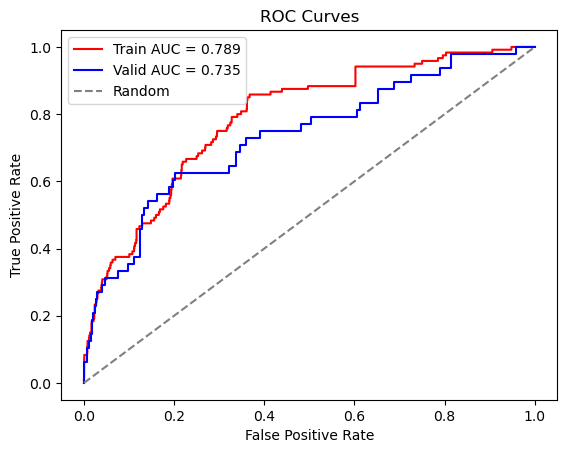

In [37]:
# predict probabilities on train and valid sets
y_train_scores = model.predict_proba(X_train)[:, 1]
y_valid_scores = model.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

In [38]:
# Not a valid metric since the data is imbalanced
print(f'Training Accuracy: {model.score(X_train, y_train)}')
print(f'Validation Accuracy: {model.score(X_valid, y_valid)}')

Training Accuracy: 0.9880257298367146
Validation Accuracy: 0.987993534980374


Text(0.5, 1.0, 'Confusion Matrix for Baseline')

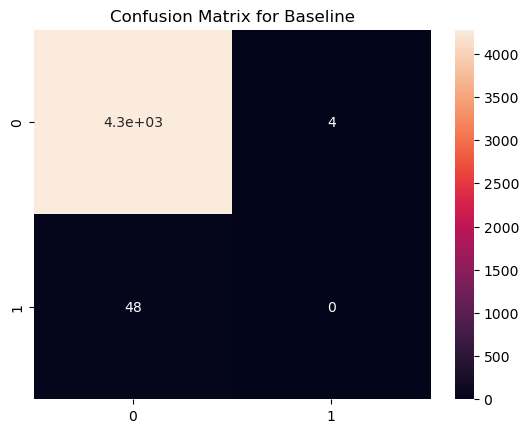

In [39]:
# Confusion Matrix
y_pred_values = model.predict(X_valid)
cf_matrix = confusion_matrix(y_valid, y_pred_values)
sns.heatmap(cf_matrix, annot = True)
plt.title('Confusion Matrix for Baseline')

In [40]:
print(classification_report(y_valid, y_pred_values))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4283
           1       0.00      0.00      0.00        48

    accuracy                           0.99      4331
   macro avg       0.49      0.50      0.50      4331
weighted avg       0.98      0.99      0.98      4331



##### Results:
- Bad performance.
- AUC on the training = 0.789 and AUC on the validation = 0.735.
- The validation accuracy metric shows that the model is 0.987 accurate. However the data is imbalanced, which means that the accuracy cannot be a valid evaluation metric.
- The confusion matrix and the classification report reveal that it wasn't able to capture any of the anomalies, classifying 48 normal values as anomalous and 4 anomalous entries as normal.
- The classification matrix also shows that the macro-averaged precision is 0.49, but and the macro-averaged recall is 0.5.
- The main reason for this bad performance is that is model uses only a subset of the features (diregarding the datetime features). In addition, no significant features has been extracted.

Let us improve the performance:
___

# 3 Improved System

In this section, I will iteratively refine my preprocessing techniques and features (e.g., by including all features, engineering new ones, and then selecting the most powerful ones) to improve the performance of my model on the validation set.
1. Splitting Optimization (Chossing the most suitable splitting technique between random split and stratified split)
2. Feature Engineering (Feature Extraction and Feature Selection)
3. Data Preprocessing (Scaling numerical features and encoding categorical features)
4. Deploying the Logistic Regression model on all the features
5. Selecting the most important features based on their correlation with the anomaly types
6. Deploying the Logistic Regression on the selected features and comparing.

## Splitting Optimization

In [41]:
df.head()

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,CashSettlementDate,ShareSettlementDate,LocalValueRate,LocalEquivalent,CreationDate,Anomaly,Anomaly Type
0,12,1662,953,3910,7,1302,0,454,454,0,454,1525.713,1235.779,1365.730,0.000,300.0,0.0,0,0.0,7,1885143.450,2022-12-30,2022-12-30,0.306,576945.890141,2023-01-01 14:06:00,0,0
1,12,1662,954,1885,0,15,17,206,206,0,465,37809.000,0.152,0.245,8.800,0.0,1.0,0,0.0,91,5737.168,2023-01-05,2023-01-02,1.000,5746.968000,2023-01-02 13:00:00,0,0
2,11,1662,954,1930,0,15,17,206,206,0,465,100000.000,0.058,0.042,8.626,0.0,1.0,0,0.0,91,5759.626,2023-01-05,2023-01-02,1.000,5800.000000,2023-01-02 13:00:00,0,0
3,11,1662,954,1930,0,15,17,206,206,0,465,1850000.000,0.057,0.042,159.009,0.0,17.0,0,0.0,91,106181.009,2023-01-05,2023-01-02,1.000,105450.000000,2023-01-02 13:00:00,0,0
4,11,1662,954,1930,0,15,17,206,206,0,465,500000.000,0.058,0.042,43.200,0.0,6.0,0,0.0,91,28849.200,2023-01-05,2023-01-02,1.000,29000.000000,2023-01-02 13:00:00,0,0


In [42]:
train_rand, valid_rand = train_test_split(df, test_size=0.2, random_state=11, shuffle=True)
train_strat, valid_strat = train_test_split(df, test_size=0.2, random_state=11, shuffle=True, stratify=df.Anomaly)

In [43]:
# Calculate the proportions for each category in each split
all_proportions = df['Anomaly'].value_counts(normalize = True)
train_rand_proportions = train_rand['Anomaly'].value_counts(normalize=True)
valid_rand_proportions = valid_rand['Anomaly'].value_counts(normalize=True)
train_strat_proportions = train_strat['Anomaly'].value_counts(normalize=True)
valid_strat_proportions = valid_strat['Anomaly'].value_counts(normalize=True)

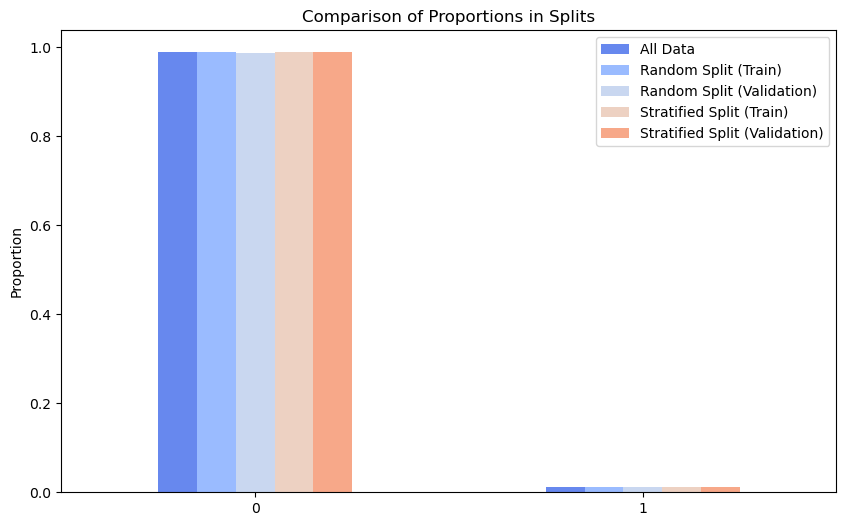

In [44]:
sns.set_palette('coolwarm')
# Create a DataFrame to hold the proportions
proportions_df = pd.DataFrame({
    'All Data':all_proportions,
    'Random Split (Train)': train_rand_proportions,
    'Random Split (Validation)': valid_rand_proportions,
    'Stratified Split (Train)': train_strat_proportions,
    'Stratified Split (Validation)': valid_strat_proportions
})

# Create a side-by-side bar plot
proportions_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Proportions in Splits')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

There is not much difference between random split and stratified split by the target variable. We will use the stratified split.

In [45]:
train, valid = train_test_split(df, test_size=0.2, random_state=11, shuffle=True, stratify=df.Anomaly)

## Feature Extraction

Let's derive some useful features based on each anomaly type:

**Anomaly 1**: Transaction occurring outside market working days (all weekdays except Friday) and working hours (8AM - 6PM)
- Working days and working hours 
- Binary field showing being 1 if transactions are occuring outside of working days and working hours and 0 otherwise

**Anomaly 2**: Cash settlement date occurring before share settlement date
- Difference between the share settlement date and the cash settlement date (if negative then anomolous)
- Binary field being 1 if the difference is negative, and zero otherwise.

**Anomaly 3**: Unit price of a product deviating significantly from its average cost
- Ratio between unit price and the average price (if the ratio is close to 1, then normal. If ratio is big, then anomalous)

**Anomaly 4**: Ticket charge deviating significantly from the usual ticket charge pattern
- *No need to extract a new feature. Normalization will do the job.*

**Anomaly 5**: Local settlement rate deviating significantly from the usual local exchange rate pattern for the same currency
- Binary field being 1 if the local settlement rate is an outlier relative to the usual local settlement rate for the same currency and 0 otherwise.

**Anomaly 6**: Product quantity purchase/sale deviating significantly from the usual product quantity purchase/sale pattern
- *No need to extract a new feature. Normalization will do the job.*

**Anomaly 7**: Negative quantity or value amount which is a classic mistake
- Binary feature being 1 when quantity or value amount is negative, and 1 otherwise.

In [46]:
df.head()

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,CashSettlementDate,ShareSettlementDate,LocalValueRate,LocalEquivalent,CreationDate,Anomaly,Anomaly Type
0,12,1662,953,3910,7,1302,0,454,454,0,454,1525.713,1235.779,1365.730,0.000,300.0,0.0,0,0.0,7,1885143.450,2022-12-30,2022-12-30,0.306,576945.890141,2023-01-01 14:06:00,0,0
1,12,1662,954,1885,0,15,17,206,206,0,465,37809.000,0.152,0.245,8.800,0.0,1.0,0,0.0,91,5737.168,2023-01-05,2023-01-02,1.000,5746.968000,2023-01-02 13:00:00,0,0
2,11,1662,954,1930,0,15,17,206,206,0,465,100000.000,0.058,0.042,8.626,0.0,1.0,0,0.0,91,5759.626,2023-01-05,2023-01-02,1.000,5800.000000,2023-01-02 13:00:00,0,0
3,11,1662,954,1930,0,15,17,206,206,0,465,1850000.000,0.057,0.042,159.009,0.0,17.0,0,0.0,91,106181.009,2023-01-05,2023-01-02,1.000,105450.000000,2023-01-02 13:00:00,0,0
4,11,1662,954,1930,0,15,17,206,206,0,465,500000.000,0.058,0.042,43.200,0.0,6.0,0,0.0,91,28849.200,2023-01-05,2023-01-02,1.000,29000.000000,2023-01-02 13:00:00,0,0


In [47]:
# Extract hour feature
def add_hour_feature(df):
    hour = df['CreationDate'].dt.hour
    return hour

# Extract weekday feature (0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday....)
def add_weekday_feature(df):
    weekday = df['CreationDate'].dt.weekday
    return weekday

# Extract difference between the cash settlement date and the share settlement date 
def date_difference(df):
    date_difference = df['CashSettlementDate'] - df['ShareSettlementDate']
    num_days = date_difference.dt.days
    return num_days

In [48]:
# Creating a copy of our dataframe
df_copy = df.copy()

In [49]:
df_copy['hour'] = add_hour_feature(df_copy)
df_copy['weekday'] = add_weekday_feature(df_copy)
df_copy['date_difference'] = date_difference(df_copy)
df_copy

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,CashSettlementDate,ShareSettlementDate,LocalValueRate,LocalEquivalent,CreationDate,Anomaly,Anomaly Type,hour,weekday,date_difference
0,12,1662,953,3910,7,1302,0,454,454,0,454,1525.713,1235.779,1365.730,0.000,300.000,0.0,0,0.0,7,1885143.450,2022-12-30,2022-12-30,0.306,576945.890141,2023-01-01 14:06:00,0,0,14,6,0
1,12,1662,954,1885,0,15,17,206,206,0,465,37809.000,0.152,0.245,8.800,0.000,1.0,0,0.0,91,5737.168,2023-01-05,2023-01-02,1.000,5746.968000,2023-01-02 13:00:00,0,0,13,0,3
2,11,1662,954,1930,0,15,17,206,206,0,465,100000.000,0.058,0.042,8.626,0.000,1.0,0,0.0,91,5759.626,2023-01-05,2023-01-02,1.000,5800.000000,2023-01-02 13:00:00,0,0,13,0,3
3,11,1662,954,1930,0,15,17,206,206,0,465,1850000.000,0.057,0.042,159.009,0.000,17.0,0,0.0,91,106181.009,2023-01-05,2023-01-02,1.000,105450.000000,2023-01-02 13:00:00,0,0,13,0,3
4,11,1662,954,1930,0,15,17,206,206,0,465,500000.000,0.058,0.042,43.200,0.000,6.0,0,0.0,91,28849.200,2023-01-05,2023-01-02,1.000,29000.000000,2023-01-02 13:00:00,0,0,13,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,12,0,954,5351,0,2041,48,366,366,0,366,1848.000,2.700,2.909,8.122,3.493,0.0,0,0.0,177,4977.985,2023-05-30,2023-05-30,0.084,419.126400,2023-05-30 16:00:00,0,0,16,1,0
14467,12,0,954,5351,0,1983,48,366,366,0,366,1212.000,2.700,2.904,5.327,2.291,0.0,0,0.0,177,3264.783,2023-05-30,2023-05-30,0.084,274.881600,2023-05-30 16:00:00,0,0,16,1,0
14468,12,0,954,5351,0,2016,48,366,366,0,366,1212.000,2.700,2.904,5.327,2.291,0.0,0,0.0,177,3264.783,2023-05-30,2023-05-30,0.084,274.881600,2023-05-30 16:00:00,0,0,16,1,0
14469,12,0,954,5351,0,2015,48,366,366,0,366,1195.000,2.700,2.903,5.252,2.259,0.0,0,0.0,177,3218.989,2023-05-30,2023-05-30,0.084,271.026000,2023-05-30 16:00:00,0,0,16,1,0


In [50]:
# Exract binary field being 1 if transactions are occuring outside of working days and working hours and 0 otherwise
def detect_outside_working_time(df):
    # Define working hours
    start_working_hour = 8
    end_working_hour = 18
    # Define non-working day (Friday)
    non_working_day = 4

    def is_outside_working_time(row):
        if row['weekday'] != non_working_day:
            if start_working_hour <= row['hour'] < end_working_hour:
                return 0
        return 1
    
    outside_working_time = df.apply(is_outside_working_time, axis=1)
    return outside_working_time


# Extract binary field being 1 if the date difference is negative and 0 otherwise
def detect_negative_date_difference(df):
    negative_date_difference = (df['date_difference'] < 0).astype(int)
    return negative_date_difference

# Extract ratio between unit price and the average price (If ratio is big, then anomalous)
# Added 1 in the denominator to handle values that are 0
def unitprice_avgcost_ratio(df):
    unitprice_avgcost_ratio = df['UnitPrice']/(df['AVGCost']+1)
    return unitprice_avgcost_ratio

# Extract binary field being 1 if the local value rate is an outlier relative to the usual local value rate for the same currency and 0 otherwise.
def detect_localvaluerate_outliers(df):
    def is_outlier(s):
        z_scores = (s - s.mean()) / s.std()
        return np.abs(z_scores) > 3  # Adjust the threshold as needed
    
    grouped = df.groupby('ValueCurrencyId')['LocalValueRate']
    outliers = grouped.transform(is_outlier)
    return outliers.astype(int)

def detect_negative_quantity_or_valueamount(df):
    negative_quantity_or_valueamount = ((df['Quantity'] <= 0) | (df['ValueAmount'] <= 0)).astype(int)
    return negative_quantity_or_valueamount

In [51]:
def add_extra_features(df):
    outside_working_time = detect_outside_working_time(df)
    negative_date_difference = detect_negative_date_difference(df)
    unitprice_avgcost_ratio_val = unitprice_avgcost_ratio(df)
    localvaluerate_outliers = detect_localvaluerate_outliers(df)
    negative_quantity_or_valueamount = detect_negative_quantity_or_valueamount(df)
    
    # Create a new DataFrame with the additional features
    new_columns = ['outside_working_time', 'negative_date_difference','unitprice_avgcost_ratio', 'localvaluerate_outliers', 'negative_quantity_valueamount']
    
    extra_features_df = pd.DataFrame({
        'outside_working_time' : outside_working_time,
        'negative_date_difference': negative_date_difference,
        'unitprice_avgcost_ratio': unitprice_avgcost_ratio_val,
        'localvaluerate_outliers': localvaluerate_outliers,
        'negative_quantity_valueamount': negative_quantity_or_valueamount
    }, columns=new_columns)
    
    # Concatenate the new DataFrame with the original DataFrame
    combined_df = pd.concat([df, extra_features_df], axis=1)
    
    return combined_df

##### Testing the function:

In [52]:
df_copy_new = add_extra_features(df_copy)
df_copy_new[df_copy_new['Anomaly Type']==5]

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,CashSettlementDate,ShareSettlementDate,LocalValueRate,LocalEquivalent,CreationDate,Anomaly,Anomaly Type,hour,weekday,date_difference,outside_working_time,negative_date_difference,unitprice_avgcost_ratio,localvaluerate_outliers,negative_quantity_valueamount
814,11,7127,953,5357,4755,1535,0,457,457,201,0,500.00,1000.000,1000.000,0.000,0.000,0.0,0,0.0,7,500000.000,2023-01-10,2023-01-10,25.50,1.275000e+07,2023-01-09 16:54:00,1,5,16,0,0,0,0,0.999001,1,0
3215,12,1662,954,1884,0,1843,17,6,6,545,6,8200.00,0.801,0.592,6.568,0.000,1.0,0,0.0,91,6560.632,2023-02-02,2023-01-30,17.00,1.116594e+05,2023-01-30 12:58:00,1,5,12,0,3,0,0,0.503141,1,0
3602,11,0,954,5152,0,1783,3,539,539,0,539,1000.00,2.039,2.179,2.087,0.000,2.5,0,0.0,91,2043.587,2023-02-06,2023-02-01,11.00,2.242900e+04,2023-02-01 13:19:00,1,5,13,2,5,0,0,0.641397,1,0
3797,12,1662,954,5152,0,1782,3,539,539,0,539,500.00,2.030,2.176,1.015,0.000,0.5,0,0.0,91,1013.485,2023-02-08,2023-02-05,11.00,1.116500e+04,2023-02-05 13:03:00,1,5,13,6,3,0,0,0.639169,1,0
5665,11,1662,954,2114,0,1681,48,362,362,0,362,612.00,33.900,34.999,0.000,32.158,0.0,0,0.0,146,20778.958,2023-02-21,2023-02-21,9.04,1.875511e+05,2023-02-21 15:43:00,1,5,15,1,0,0,0,0.941693,1,0
7652,11,1662,954,1879,0,1782,3,539,539,0,539,8500.00,0.325,0.326,4.144,0.000,0.5,0,0.0,91,2767.144,2023-03-23,2023-03-20,23.50,6.491875e+04,2023-03-20 13:14:00,1,5,13,0,3,0,0,0.245098,1,0
7815,12,1662,954,1943,0,1782,3,539,539,0,539,20.00,0.108,0.109,0.250,0.000,0.0,0,0.0,91,1.910,2023-03-26,2023-03-21,32.20,6.955200e+01,2023-03-21 13:08:00,1,5,13,1,5,0,0,0.097385,1,0
8190,11,1662,953,5379,5872,2092,48,575,575,0,575,399.00,117.332,117.332,0.000,56.180,0.0,0,0.0,146,46871.780,2023-03-23,2023-03-23,26.60,1.245291e+06,2023-03-23 14:59:00,1,5,14,3,0,0,0,0.991549,1,0
9691,12,0,954,5228,0,1332,0,457,457,0,457,212.92,1000.000,1000.000,0.000,0.000,0.0,0,0.0,7,212920.000,2023-04-10,2023-04-10,120.00,2.555040e+07,2023-04-10 16:18:00,1,5,16,0,0,0,0,0.999001,1,0
11269,11,0,954,2261,0,1967,48,366,366,0,366,2285.00,14.000,13.570,0.000,75.067,0.0,0,0.0,177,32065.067,2023-05-01,2023-05-01,19.03,6.087697e+05,2023-05-01 13:17:00,1,5,13,0,0,0,0,0.960879,1,0


#### Analyzing Relationships with the Anomaly feature and Anomaly Type Feature

In [53]:
corr = df_copy_new.corr()

In [54]:
corr["Anomaly"].sort_values(ascending=False)

Anomaly                          1.000000
Anomaly Type                     0.807905
outside_working_time             0.647893
negative_quantity_valueamount    0.420637
Quantity                         0.264760
negative_date_difference         0.243400
TicketCharges                    0.242033
LocalEquivalent                  0.200091
hour                             0.188965
LocalValueRate                   0.176893
localvaluerate_outliers          0.167950
ValueAmount                      0.087306
ClientId                         0.068027
unitprice_avgcost_ratio          0.051065
BrokerageFees                    0.018582
ShareAccountId                   0.014779
TradingAccountId                 0.014779
UnitPrice                        0.012226
weekday                          0.008121
AVGCost                          0.007672
BrokerId                         0.006670
ProductId                        0.006197
HoldingId                        0.004557
SettlementFees                  -0

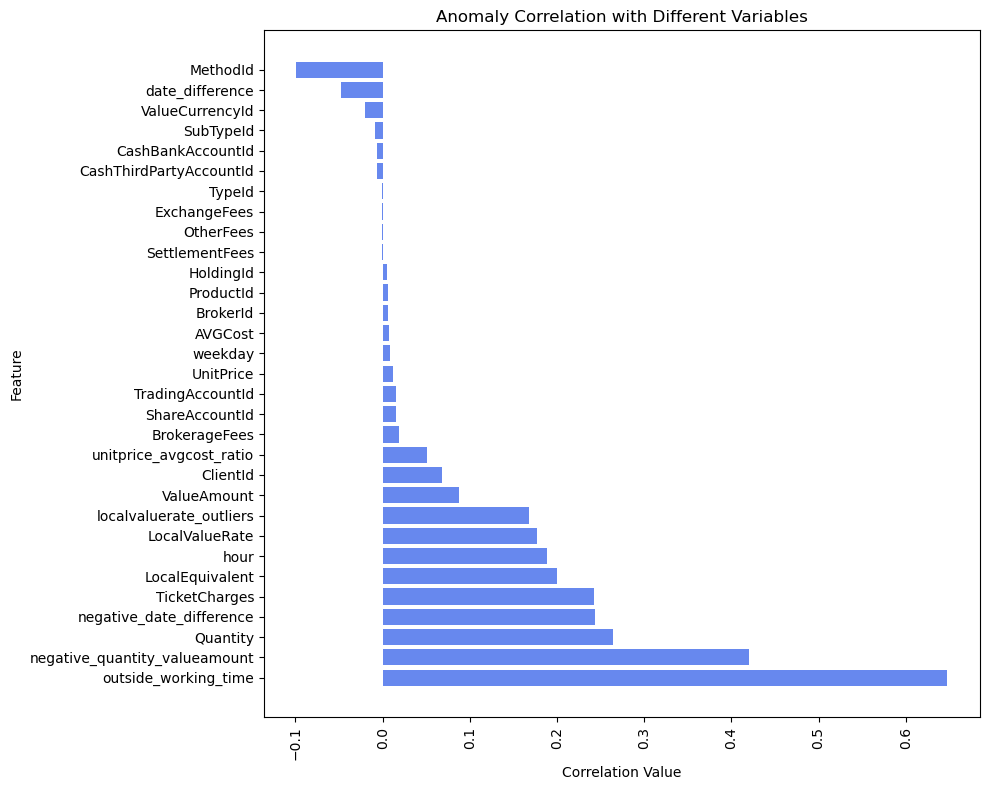

In [55]:
sorted_anomaly = corr["Anomaly"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

Perfect! The new extracted features have a higher correlation with the Anomaly feature than most of the existing!

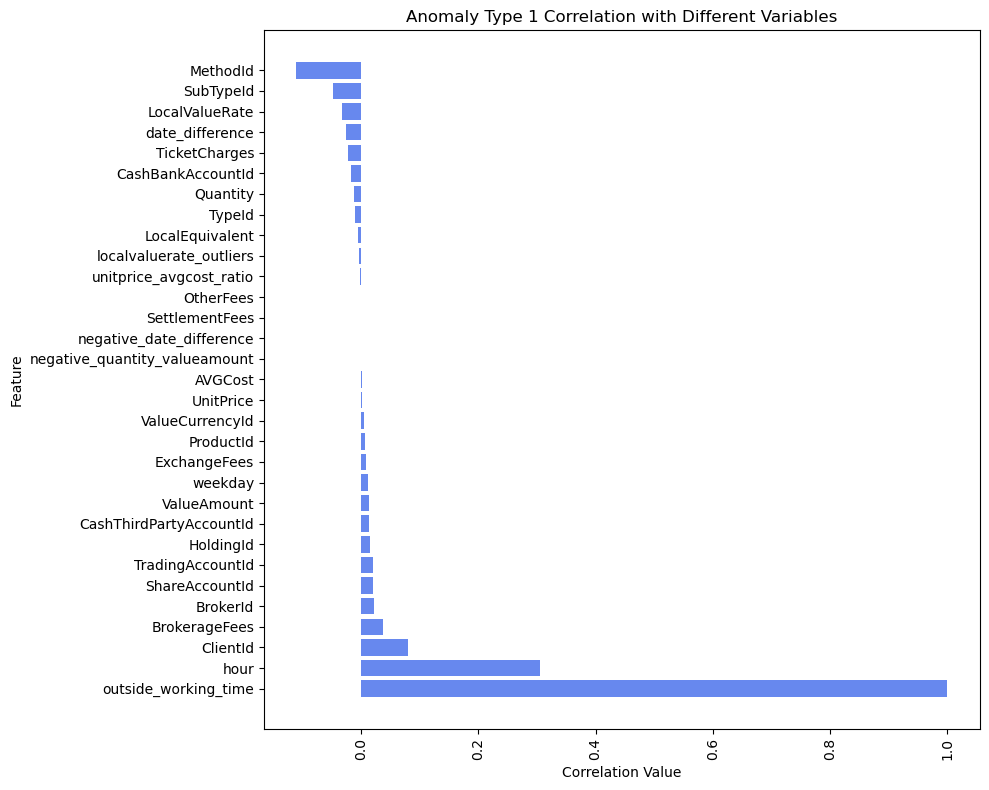

In [56]:
anomaly1 = df_copy_new[(df_copy_new['Anomaly Type'] == 1) | (df_copy_new['Anomaly Type'] == 0)]
corr1 = anomaly1.corr()
sorted_anomaly = corr1["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Type 1 Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

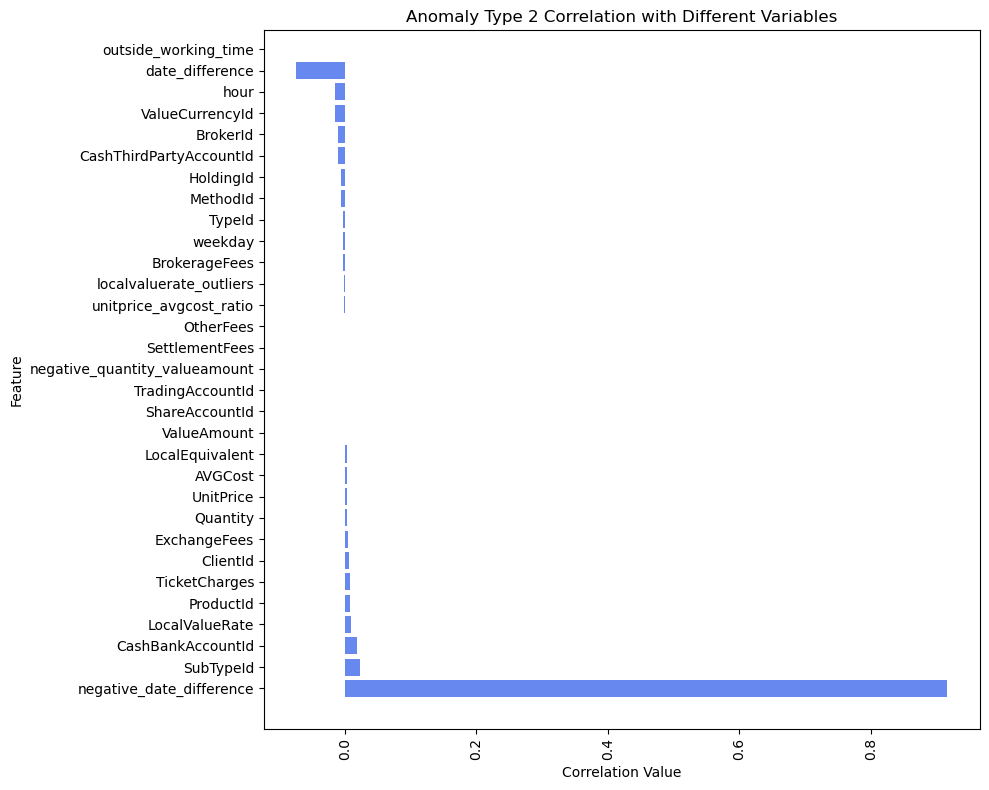

In [57]:
anomaly2 = df_copy_new[(df_copy_new['Anomaly Type'] == 2) | (df_copy_new['Anomaly Type'] == 0)]
corr2 = anomaly2.corr()
sorted_anomaly = corr2["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Type 2 Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

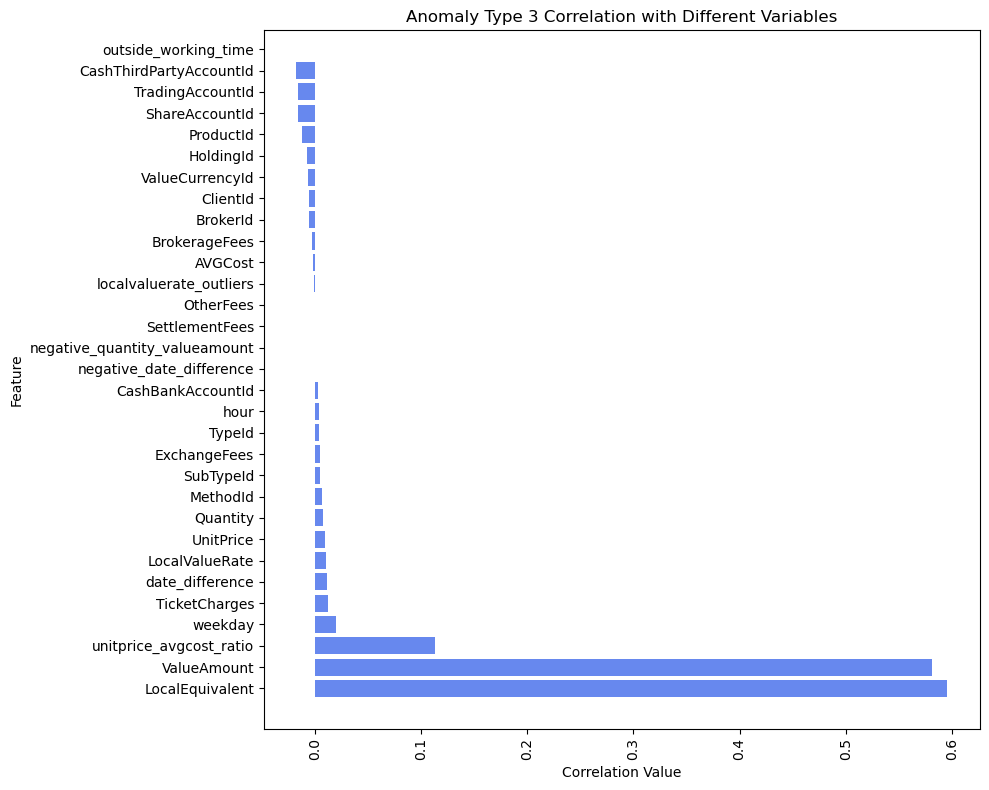

In [58]:
anomaly3 = df_copy_new[(df_copy_new['Anomaly Type'] == 3) | (df_copy_new['Anomaly Type'] == 0)]
corr3 = anomaly3.corr()
sorted_anomaly = corr3["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Type 3 Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

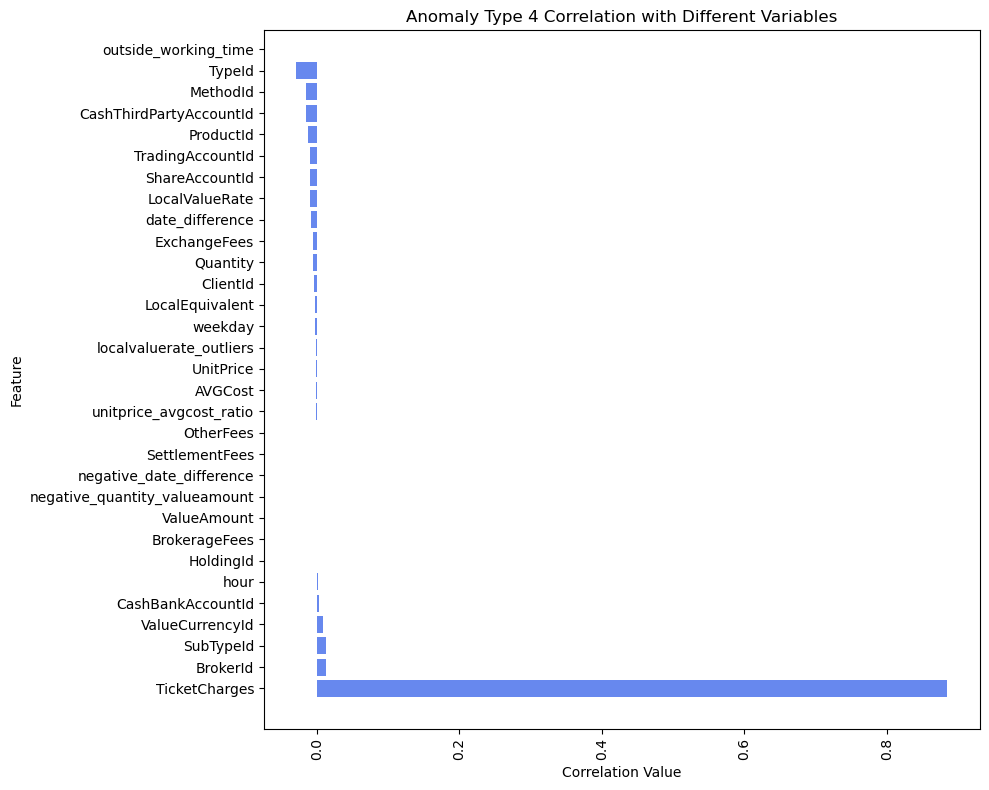

In [59]:
anomaly4 = df_copy_new[(df_copy_new['Anomaly Type'] == 4) | (df_copy_new['Anomaly Type'] == 0)]
corr4 = anomaly4.corr()
sorted_anomaly = corr4["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Type 4 Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

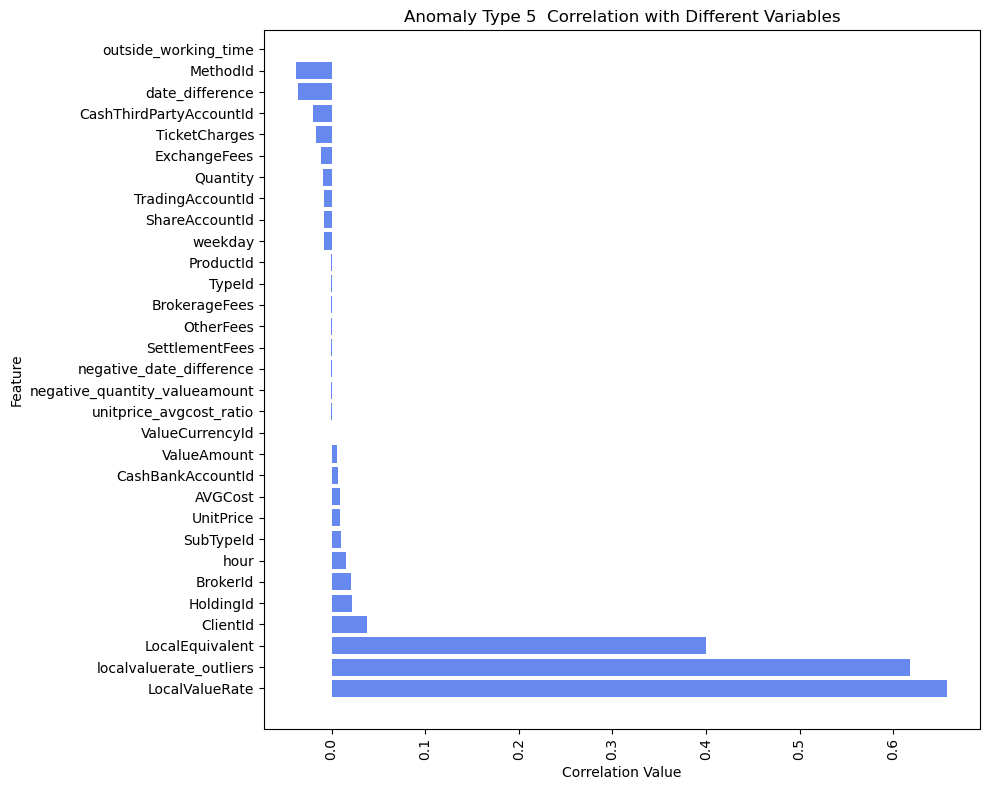

In [60]:
anomaly5 = df_copy_new[(df_copy_new['Anomaly Type'] == 5) | (df_copy_new['Anomaly Type'] == 0)]
corr5 = anomaly5.corr()
sorted_anomaly = corr5["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Type 5  Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

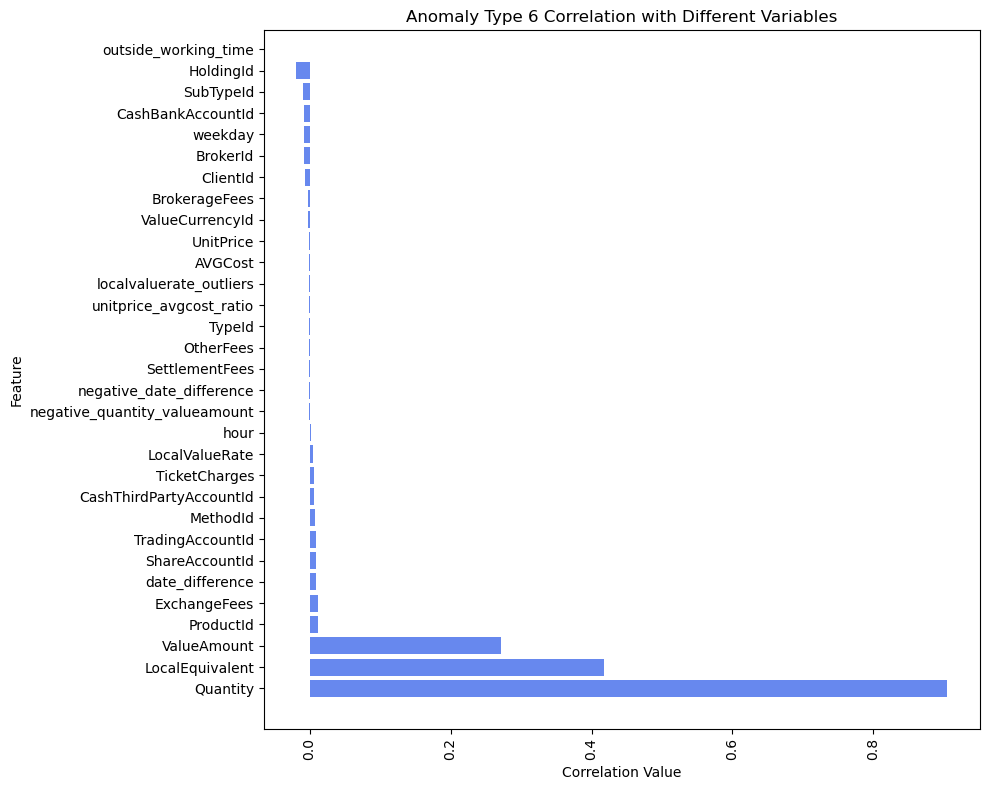

In [61]:
anomaly6 = df_copy_new[(df_copy_new['Anomaly Type'] == 6) | (df_copy_new['Anomaly Type'] == 0)]
corr6 = anomaly6.corr()
sorted_anomaly = corr6["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Type 6 Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

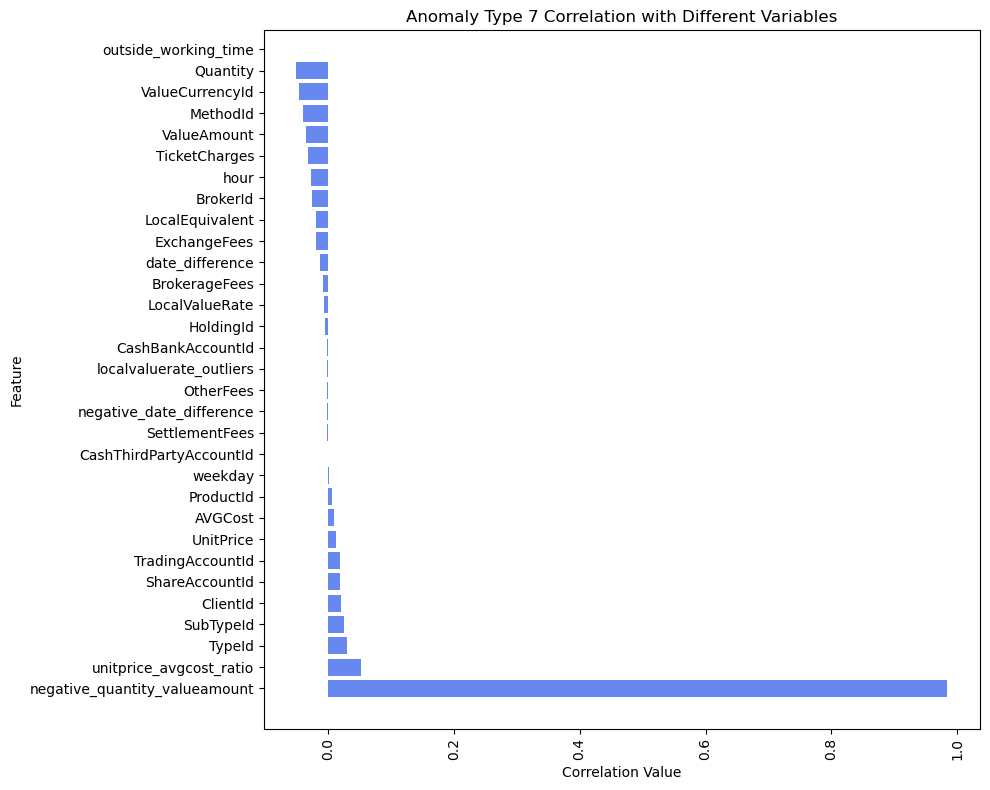

In [62]:
anomaly7 = df_copy_new[(df_copy_new['Anomaly Type'] == 7) | (df_copy_new['Anomaly Type'] == 0)]
corr7 = anomaly7.corr()
sorted_anomaly = corr7["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
plt.figure(figsize=(10, 8))
plt.barh(sorted_anomaly.index, sorted_anomaly.values)
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.title("Anomaly Type 7 Correlation with Different Variables")
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

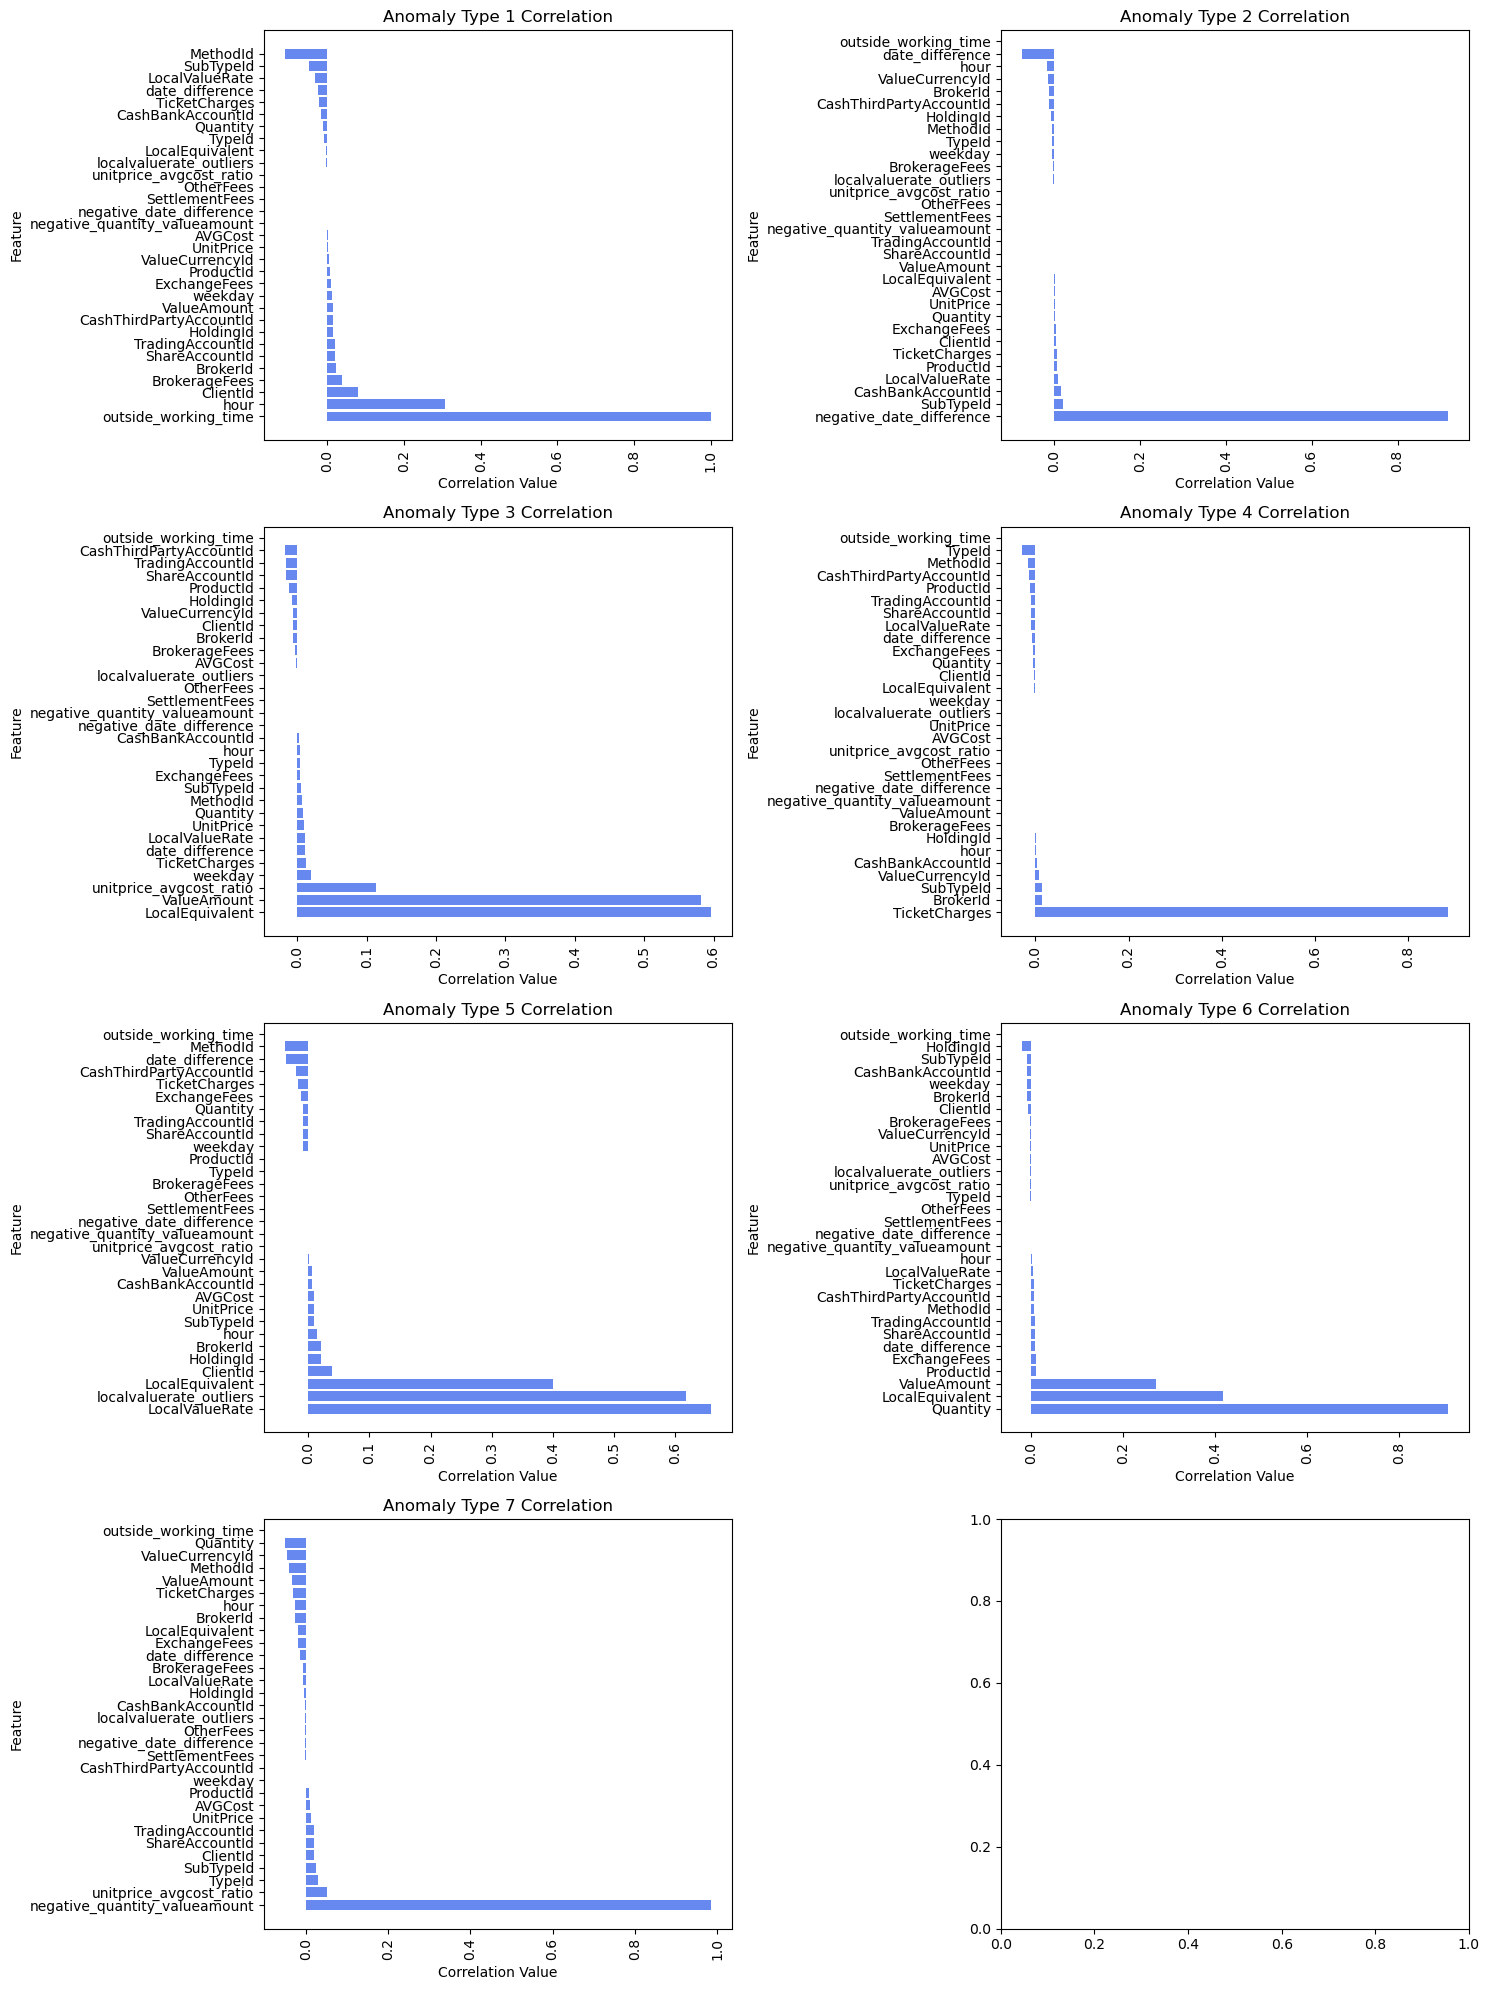

In [63]:
anomaly_types = [1, 2, 3, 4, 5, 6, 7]
num_anomaly_types = len(anomaly_types)

num_rows = 4
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

for i, anomaly_type in enumerate(anomaly_types):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    anomaly_data = df_copy_new[(df_copy_new['Anomaly Type'] == anomaly_type) | (df_copy_new['Anomaly Type'] == 0)]
    corr = anomaly_data.corr()
    sorted_anomaly = corr["Anomaly Type"].sort_values(ascending=False).drop(index=['Anomaly', 'Anomaly Type'])
    
    ax.barh(sorted_anomaly.index, sorted_anomaly.values)
    ax.set_xlabel("Correlation Value")
    ax.set_ylabel("Feature")
    ax.set_title(f"Anomaly Type {anomaly_type} Correlation")
    ax.tick_params(axis='x', rotation=90)
    
    if i == num_anomaly_types:
        ax.axis('off')

plt.tight_layout()
plt.show()

By using FunctionTransformer, we ensure that the custom transformations seamlessly integrate into the scikit-learn workflow and can be easily combined with other transformers and models within pipelines.

In [64]:
# Make add_extra_features() a FunctionFransformer
feature_adder = FunctionTransformer(add_extra_features, validate = False)

In [65]:
# Extracting hour, weekday and date_difference features from original dataset then dropping the features of type datetime
df['hour'] = add_hour_feature(df)
df['weekday'] = add_weekday_feature(df)
df['date_difference'] = date_difference(df)
df = df.drop(['CashSettlementDate','ShareSettlementDate','CreationDate'], axis = 1)
df

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,LocalValueRate,LocalEquivalent,Anomaly,Anomaly Type,hour,weekday,date_difference
0,12,1662,953,3910,7,1302,0,454,454,0,454,1525.713,1235.779,1365.730,0.000,300.000,0.0,0,0.0,7,1885143.450,0.306,576945.890141,0,0,14,6,0
1,12,1662,954,1885,0,15,17,206,206,0,465,37809.000,0.152,0.245,8.800,0.000,1.0,0,0.0,91,5737.168,1.000,5746.968000,0,0,13,0,3
2,11,1662,954,1930,0,15,17,206,206,0,465,100000.000,0.058,0.042,8.626,0.000,1.0,0,0.0,91,5759.626,1.000,5800.000000,0,0,13,0,3
3,11,1662,954,1930,0,15,17,206,206,0,465,1850000.000,0.057,0.042,159.009,0.000,17.0,0,0.0,91,106181.009,1.000,105450.000000,0,0,13,0,3
4,11,1662,954,1930,0,15,17,206,206,0,465,500000.000,0.058,0.042,43.200,0.000,6.0,0,0.0,91,28849.200,1.000,29000.000000,0,0,13,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,12,0,954,5351,0,2041,48,366,366,0,366,1848.000,2.700,2.909,8.122,3.493,0.0,0,0.0,177,4977.985,0.084,419.126400,0,0,16,1,0
14467,12,0,954,5351,0,1983,48,366,366,0,366,1212.000,2.700,2.904,5.327,2.291,0.0,0,0.0,177,3264.783,0.084,274.881600,0,0,16,1,0
14468,12,0,954,5351,0,2016,48,366,366,0,366,1212.000,2.700,2.904,5.327,2.291,0.0,0,0.0,177,3264.783,0.084,274.881600,0,0,16,1,0
14469,12,0,954,5351,0,2015,48,366,366,0,366,1195.000,2.700,2.903,5.252,2.259,0.0,0,0.0,177,3218.989,0.084,271.026000,0,0,16,1,0


In [66]:
# Stratified Split
train, valid = train_test_split(df, test_size=0.2, random_state=11, shuffle=True, stratify=df.Anomaly)

In [67]:
y_type_train = train['Anomaly Type']
y_type_valid = valid['Anomaly Type']

In [68]:
# Extract X and y from the train dataset
X_train = train.drop(['Anomaly', 'Anomaly Type'], axis=1)
y_train = train[['Anomaly']]

# Extract X and y from the valid dataset
X_valid = valid.drop(['Anomaly', 'Anomaly Type'], axis=1)
y_valid = valid[['Anomaly']]

##### Testing the feature engineering transformer

In [69]:
X_train_sample = X_train.sample(n=400, random_state = 0)
X_valid_sample = X_valid.sample(n=200, random_state = 0)

In [70]:
X_train_sample_tr = feature_adder.fit_transform(X_train_sample)

In [71]:
X_train_sample_tr

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,LocalValueRate,LocalEquivalent,hour,weekday,date_difference,outside_working_time,negative_date_difference,unitprice_avgcost_ratio,localvaluerate_outliers,negative_quantity_valueamount
2590,12,1662,954,5345,0,1690,48,362,362,0,362,38.0,174.000,187.527,0.000,10.249,0.000,0,0.0,146,6601.751,0.081,535.572,15,1,0,0,0,0.922945,0,0
553,12,0,954,2064,0,1595,17,5,5,0,467,3970.0,1.630,1.235,6.471,0.000,0.704,0,0.0,91,6463.924,1.000,6471.100,14,3,5,0,0,0.729306,0,0
8588,12,0,954,5152,0,1783,3,539,539,0,539,1000.0,1.798,2.031,1.798,0.000,0.500,0,0.0,91,1795.702,1.000,1798.000,14,1,5,0,0,0.593204,0,0
8295,11,0,954,1949,0,2069,3,539,539,0,539,10000.0,0.260,0.261,3.900,0.000,0.500,0,0.0,91,2604.400,1.000,2600.000,13,6,3,0,0,0.206186,0,0
5787,12,0,954,1896,0,2061,3,539,539,0,539,50000.0,0.116,0.118,6.146,0.000,2.000,0,0.0,91,5791.854,1.000,5800.000,13,2,7,0,0,0.103757,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,12,1662,954,2087,0,780,3,8,8,0,8,832766.0,0.078,0.097,97.347,0.000,5.000,0,0.0,91,64520.295,1.000,64955.748,9,6,5,0,0,0.071103,0,0
9570,11,1662,954,1885,0,2120,3,539,539,0,539,28932.0,0.112,0.116,3.240,0.000,0.500,0,0.0,91,3244.124,1.000,3240.384,13,6,3,0,0,0.100358,0,0
12096,12,1662,954,2099,0,2113,3,539,539,0,539,3000.0,0.189,0.196,0.851,0.000,0.500,0,0.0,91,565.649,1.000,567.000,13,1,5,0,0,0.158027,0,0
8953,12,1662,954,2099,0,1782,3,539,539,0,539,43105.0,0.200,0.198,12.932,0.000,2.500,0,0.0,91,8605.568,1.000,8621.000,13,0,3,0,0,0.166945,0,0


In [72]:
X_valid_sample_tr = feature_adder.transform(X_valid_sample)

In [73]:
X_valid_sample_tr

,TypeId,SubTypeId,MethodId,HoldingId,ClientId,ProductId,BrokerId,TradingAccountId,ShareAccountId,CashBankAccountId,CashThirdPartyAccountId,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueCurrencyId,ValueAmount,LocalValueRate,LocalEquivalent,hour,weekday,date_difference,outside_working_time,negative_date_difference,unitprice_avgcost_ratio,localvaluerate_outliers,negative_quantity_valueamount
5411,12,1662,954,1896,0,1782,3,539,539,0,539,45457.0,0.122,0.124,5.546,0.000,0.5,0,0.0,91,5539.708,1.000,5545.754,13,0,3,0,0,0.108541,0,0
4626,11,1662,954,2114,0,1681,48,362,362,0,362,310.0,36.200,35.316,0.000,17.394,0.0,0,0.0,146,11239.394,0.081,908.982,15,3,0,0,0,0.996806,0,0
10592,12,1662,954,2045,0,1782,3,539,539,0,539,6517.0,0.419,0.419,4.096,0.000,0.5,0,0.0,91,2726.027,1.000,2730.623,13,2,8,0,0,0.295278,0,0
1665,11,0,954,5152,0,1783,3,539,539,0,539,500.0,2.048,2.192,1.024,0.000,0.5,0,0.0,91,1025.524,1.000,1024.000,13,2,5,0,0,0.641604,0,0
8678,11,0,954,2100,0,1853,3,539,539,0,539,77800.0,0.209,0.212,24.484,0.000,3.0,0,0.0,91,16287.684,1.000,16260.200,15,2,5,0,0,0.172442,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,11,1662,954,2100,0,1853,3,539,539,0,539,50000.0,0.220,0.225,16.500,0.000,3.0,0,0.0,91,11019.500,1.000,11000.000,13,0,3,0,0,0.179592,0,0
1504,12,1662,954,2100,0,1782,3,539,539,0,539,17000.0,0.238,0.234,6.069,0.000,1.0,0,0.0,91,4038.931,1.000,4046.000,13,1,5,0,0,0.192869,0,0
13793,11,1662,954,2100,0,1853,3,539,539,0,539,40000.0,0.213,0.216,12.780,0.000,2.0,0,0.0,91,8534.780,1.000,8520.000,13,2,5,0,0,0.175164,0,0
4152,11,1662,954,5152,0,1782,3,539,539,0,539,1133.0,2.002,2.162,2.268,0.000,1.0,0,0.0,91,2271.534,1.000,2268.266,13,1,5,0,0,0.633144,0,0


##### Deploying the feature engineering transformer

In [74]:
X_train = feature_adder.fit_transform(X_train)
X_valid = feature_adder.transform(X_valid)

## Preprocessing

In [75]:
numerical_cols = ['Quantity','UnitPrice','AVGCost','ExchangeFees', 'BrokerageFees','TicketCharges', 'SettlementFees', 'OtherFees',
                  'ValueAmount', 'LocalValueRate', 'LocalEquivalent', 'hour', 'weekday', 'date_difference', 
                  'unitprice_avgcost_ratio']
categorical_cols = ['TypeId', 'SubTypeId', 'MethodId', 'HoldingId','ClientId', 'ProductId', 'BrokerId', 'TradingAccountId', 'ShareAccountId', 'CashBankAccountId', 'CashThirdPartyAccountId', 'ValueCurrencyId']
binary_cols = ['outside_working_time', 'negative_date_difference', 'localvaluerate_outliers', 'negative_quantity_valueamount']

In [76]:
len(numerical_cols) + len(categorical_cols) + len(binary_cols)

31

In [77]:
# Standardize the numerical data
scaler = StandardScaler()

In [78]:
# fit the scaler on the numerical columns of X_train
scaler.fit(X_train[numerical_cols])

StandardScaler()

In [79]:
# Transform the numerical columns of the X_train and X_valid
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])

In [80]:
X_train[numerical_cols]

,Quantity,UnitPrice,AVGCost,ExchangeFees,BrokerageFees,TicketCharges,SettlementFees,OtherFees,ValueAmount,LocalValueRate,LocalEquivalent,hour,weekday,date_difference,unitprice_avgcost_ratio
7128,-0.087589,-0.056417,-0.055585,-0.354945,-0.131019,-0.078790,-0.009306,-0.009669,-0.012268,0.065114,-0.035759,-0.271518,-0.618096,0.634653,-0.030327
3449,-0.094380,-0.055886,-0.055092,-0.395425,-0.131019,-0.078790,-0.009306,-0.009669,-0.012356,0.065114,-0.036714,-0.271518,-0.618096,0.634653,-0.025645
3382,-0.091243,0.100671,0.101835,-0.398915,4.075820,-0.101366,-0.009306,-0.009669,0.003193,-0.625006,-0.023081,1.594293,-1.133905,-1.935655,-0.004523
6447,0.079554,-0.044979,-0.044330,-0.398915,24.664396,-0.101366,-0.009306,-0.009669,0.050345,-0.623505,0.019927,1.594293,-1.133905,-1.935655,-0.008446
6477,-0.086426,-0.054540,-0.054453,-0.210612,-0.131019,-0.078790,-0.009306,-0.009669,-0.011794,0.065114,-0.030595,-0.271518,-0.618096,0.634653,-0.015753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11132,0.002042,-0.056163,-0.055386,0.577218,-0.131019,-0.033640,-0.009306,-0.009669,-0.010344,0.065114,-0.014815,-0.271518,1.960950,-0.393470,-0.027771
2450,-0.090169,-0.048799,-0.047997,-0.177474,0.155305,-0.101366,-0.009306,-0.009669,-0.011305,-0.622754,-0.035782,0.661387,-0.618096,-1.935655,-0.010520
11337,0.112118,-0.056627,-0.055825,0.052831,-0.131019,-0.011064,-0.009306,-0.009669,-0.010956,0.065114,-0.021522,-0.271518,-0.618096,0.634653,-0.032674
11397,0.008937,-0.055529,-0.054881,0.941122,-0.131019,-0.078790,-0.009306,-0.009669,-0.008198,0.065114,0.008416,-0.271518,-0.618096,0.634653,-0.022802


## Evaluating the Logistic Regression using all features

In [81]:
model = LogisticRegression()

In [82]:
model.fit(X_train,  y_train)

LogisticRegression()

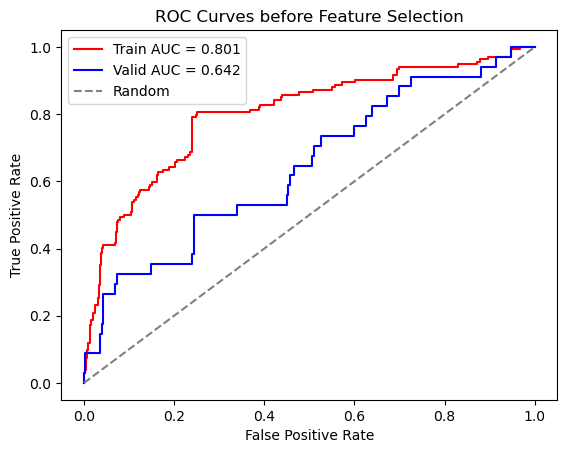

In [83]:
# predict probabilities on train and valid sets
y_train_scores = model.predict_proba(X_train)[:, 1]
y_valid_scores = model.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves before Feature Selection')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Baseline')

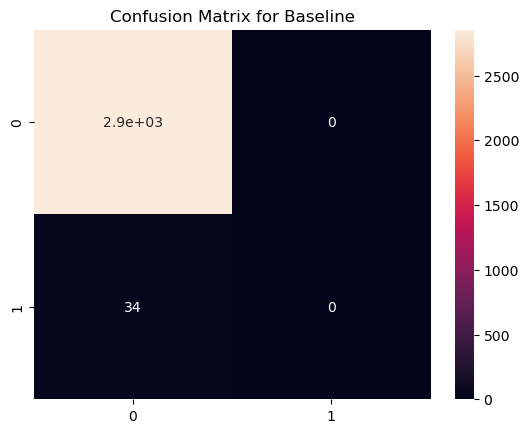

In [84]:
# Confusion Matrix
y_pred_values = model.predict(X_valid)
cf_matrix = confusion_matrix(y_valid, y_pred_values)
sns.heatmap(cf_matrix, annot = True)
plt.title('Confusion Matrix for Baseline')

In [85]:
print(classification_report(y_valid, y_pred_values))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2854
           1       0.00      0.00      0.00        34

    accuracy                           0.99      2888
   macro avg       0.49      0.50      0.50      2888
weighted avg       0.98      0.99      0.98      2888



## Feature Selection

Selecting features based on feature importance and correlation with the anomaly each anomaly type:

- Anomaly Type 1: 'outside_working_time'
- Anomaly Type 2: 'negative_date_difference'
- Anomaly Type 3: 'unitprice_avgcost_ratio', 'ValueAmount', 'LocalEquivalent'
- Anomaly Type 4: 'TicketCharges'
- Anomaly Type 5: 'localvaluerate_outliers', 'LocalValueRate'
- Anomaly Type 6: 'Quantity'
- Anomaly Type 7: 'negative_quantity_valueamount'

In [86]:
features_to_select = ['Quantity', 'TicketCharges', 'ValueAmount', 'LocalValueRate', 'LocalEquivalent', 
                        'outside_working_time', 'negative_date_difference', 'unitprice_avgcost_ratio', 
                      'localvaluerate_outliers','negative_quantity_valueamount']

In [87]:
X_train_new = X_train[features_to_select]
X_valid_new = X_valid[features_to_select]

## Evaluating the Logistic Regression using selected features

In [88]:
model = LogisticRegression()

In [89]:
model.fit(X_train_new,  y_train)

LogisticRegression()

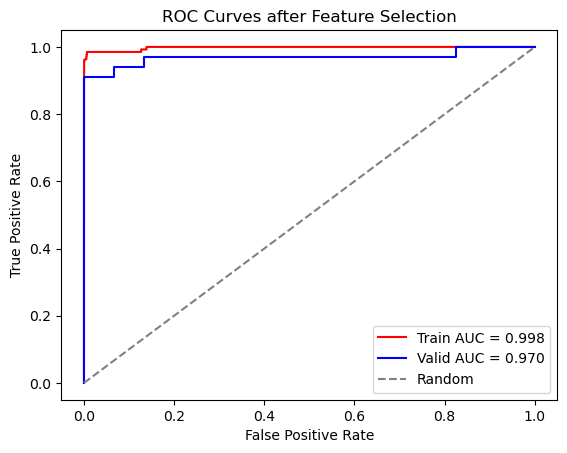

In [90]:
# predict probabilities on train and valid sets
y_train_scores = model.predict_proba(X_train_new)[:, 1]
y_valid_scores = model.predict_proba(X_valid_new)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves after Feature Selection')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Baseline')

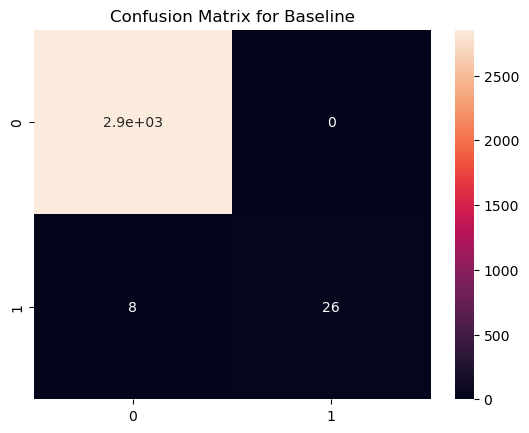

In [91]:
# Confusion Matrix
y_pred_values = model.predict(X_valid_new)
cf_matrix = confusion_matrix(y_valid, y_pred_values)
sns.heatmap(cf_matrix, annot = True)
plt.title('Confusion Matrix for Baseline')

In [92]:
print(classification_report(y_valid, y_pred_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.76      0.87        34

    accuracy                           1.00      2888
   macro avg       1.00      0.88      0.93      2888
weighted avg       1.00      1.00      1.00      2888



_**Results**_:

The model's performance improved after extracting new features and selecting the most important features among all.

### t-SNE Scatterplot 

In [93]:
y_train_new = y_train.reset_index(drop = True)

In [94]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_train_new)
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['Anomaly'] = y_train_new 

In [95]:
df_tsne

,TSNE1,TSNE2,Anomaly
0,-78.226814,53.148026,0
1,-62.045425,48.538784,0
2,1.233059,-63.997272,0
3,16.160065,-59.095577,0
4,-6.707489,61.423145,0
...,...,...,...
11543,39.816620,28.270512,0
11544,10.961131,-77.956367,0
11545,58.651943,12.190447,0
11546,57.448582,51.351219,0


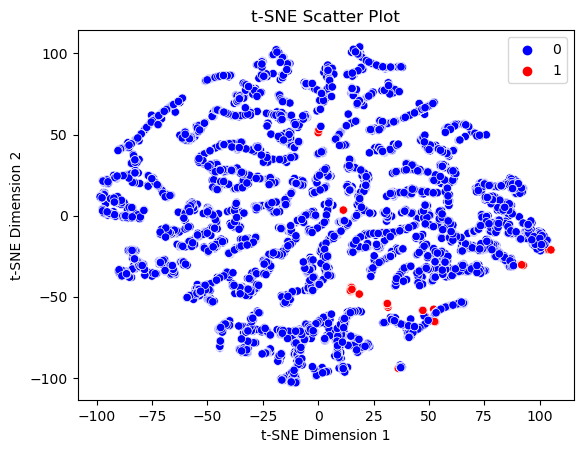

In [96]:
### Create a scatter plot
sns.scatterplot(x='TSNE1',y='TSNE2', hue = 'Anomaly', palette={0: 'blue', 1: 'red'}, data=df_tsne)
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

____
# 4 Model Optimization and Selection

## Supervised Machine Learning

In this section, I will train and optimize the hyperparameters of Logistic Regression, KNN, Gaussian Naïve Bayes, SVM, Decision Tree, Random Forest, and XGBoost to further improve the AUC and macro-averaged Recall on validation datasets.

In [97]:
# Function for training and evaluating a model

def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    # Fit the model
    model.fit(X_train, y_train.to_numpy().ravel())

    # Predict probabilities on train and validation sets
    y_train_scores = model.predict_proba(X_train)[:, 1]
    y_valid_scores = model.predict_proba(X_valid)[:, 1]

    # Calculate AUC scores on train and validation sets
    train_auc = roc_auc_score(y_train, y_train_scores)
    valid_auc = roc_auc_score(y_valid, y_valid_scores)

    # Calculate macro-averaged recall for validation data
    y_valid_pred_labels = model.predict(X_valid)
    valid_recall = recall_score(y_valid, y_valid_pred_labels, average='macro')

    # Display Train AUC, Valid AUC, and Macro-Averaged Recall
    print(f'Train AUC: {train_auc:.3f}')
    print(f'Valid AUC: {valid_auc:.3f}')
    print(f'Macro-Averaged Recall: {valid_recall:.3f}')

In [98]:
# Function for tuning the hyperparameters of a model. The metric used for scoring is the ROC-AUC

def tune_hyperparameters(model, param_grid, X_train, y_train, X_valid, y_valid):
    
    # Perform grid search with 5-fold cross-validation
    gs = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc', cv=5)
    
    # Fit the model on the training data
    gs.fit(X_train, y_train.to_numpy().ravel())
    
    # Predict on the training and validation data
    y_train_pred = gs.predict_proba(X_train)[:, 1]
    y_valid_pred = gs.predict_proba(X_valid)[:, 1]
    
    # Calculate the AUC score for the training and validation data
    train_auc = roc_auc_score(y_train, y_train_pred)
    valid_auc = roc_auc_score(y_valid, y_valid_pred)
    
    # Calculate macro-averaged recall for validation data
    y_valid_pred_labels = gs.predict(X_valid)
    valid_recall = recall_score(y_valid, y_valid_pred_labels, average='macro')
    
    # Print the best hyperparameters, AUC scores, and macro-averaged recall for the model
    print(f'Best Hyperparameters for {model.__class__.__name__}:\n{gs.best_params_}')
    print(f'Train AUC: {train_auc:.3f}')
    print(f'Valid AUC: {valid_auc:.3f}')
    print(f'Macro-Averaged Recall: {valid_recall:.3f}')

In [99]:
def evaluate_best_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train_new, y_train)

    # predict probabilities on train and valid sets
    y_train_scores = model.predict_proba(X_train)[:, 1]
    y_valid_scores = model.predict_proba(X_valid)[:,1]

    # calculate AUC scores on train and valid sets
    train_auc = roc_auc_score(y_train, y_train_scores)
    valid_auc = roc_auc_score(y_valid, y_valid_scores)

    # calculate false positive rates and true positive rates for ROC curves
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
    valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

    # plot ROC curves
    plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
    plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc = 'lower right')
    plt.legend()
    plt.show()

    # Confusion Matrix
    y_pred_values = model.predict(X_valid)
    cf_matrix = confusion_matrix(y_valid, y_pred_values)
    print(cf_matrix)
    sns.heatmap(cf_matrix, annot = True)
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(y_valid, y_pred_values))

### Logistic Regression

In [94]:
lr = LogisticRegression()

#### Evaluating the model with default parameters

In [95]:
# Call the evaluate_model function
evaluate_model(lr, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 0.998
Valid AUC: 0.970
Macro-Averaged Recall: 0.882


#### Hyperparameter tuning

In [96]:
# Define the parameter grid for hyperparameter tuning
param_grid_lr = {
    'class_weight': ['balanced'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 500]
}

In [97]:
tune_hyperparameters(lr, param_grid_lr, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for LogisticRegression:
{'C': 1, 'class_weight': 'balanced', 'max_iter': 100}
Train AUC: 0.999
Valid AUC: 0.975
Macro-Averaged Recall: 0.955


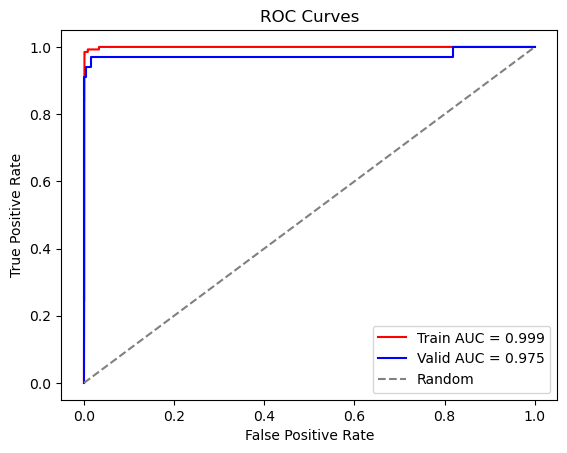

[[2850    4]
 [   3   31]]


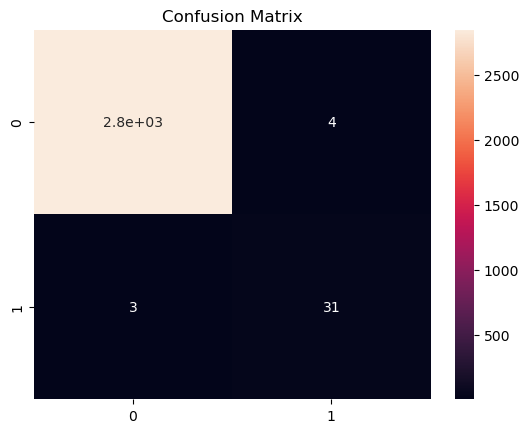

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       0.89      0.91      0.90        34

    accuracy                           1.00      2888
   macro avg       0.94      0.96      0.95      2888
weighted avg       1.00      1.00      1.00      2888



In [98]:
lr_best = LogisticRegression(C = 1, class_weight ='balanced', max_iter = 100)
evaluate_best_model(lr_best, X_train_new, y_train, X_valid_new, y_valid)

### K-Nearest Neighbors

In [99]:
knn = KNeighborsClassifier()

#### Evaluating the model with default parameters

In [100]:
# Call the evaluate_model function
evaluate_model(knn, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 1.000
Valid AUC: 0.985
Macro-Averaged Recall: 0.941


#### Hyperparameter tuning

In [101]:
# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'weights': ['uniform'],
    'n_neighbors': [3, 5, 7, 9]
}

In [102]:
tune_hyperparameters(knn, param_grid_knn, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for KNeighborsClassifier:
{'n_neighbors': 5, 'weights': 'uniform'}
Train AUC: 1.000
Valid AUC: 0.985
Macro-Averaged Recall: 0.941


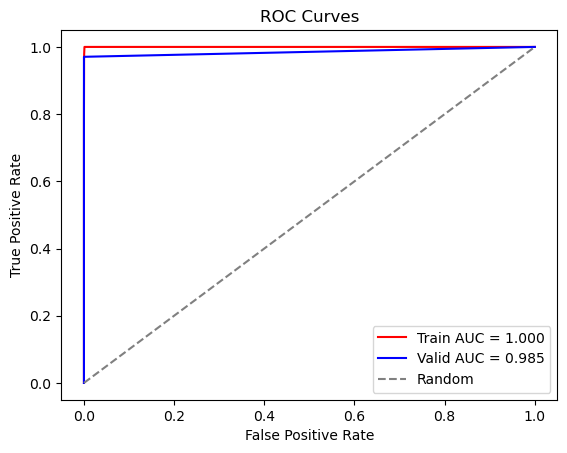

[[2854    0]
 [   4   30]]


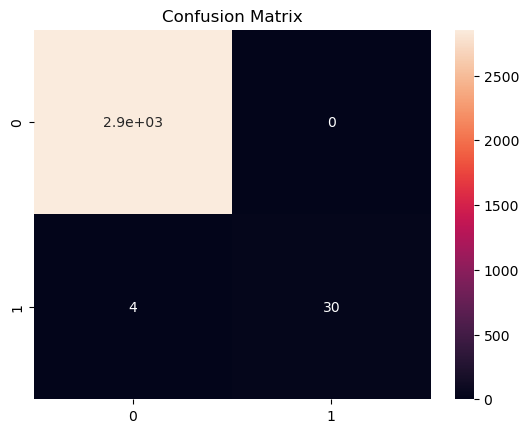

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.88      0.94        34

    accuracy                           1.00      2888
   macro avg       1.00      0.94      0.97      2888
weighted avg       1.00      1.00      1.00      2888



In [103]:
knn_best = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
evaluate_best_model(knn_best, X_train_new, y_train, X_valid_new, y_valid)

### Gaussian Naive Bayes

In [104]:
nb = GaussianNB()

#### Evaluating the model with default parameters

In [105]:
# Call the evaluate_model function
evaluate_model(nb, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 0.993
Valid AUC: 0.976
Macro-Averaged Recall: 0.951


#### Hyperparameter tuning

In [106]:
# Define the parameter grid for hyperparameter tuning
param_grid_nb = {
    'priors': [None, [0.1, 0.9]], # to account for the imbalanced target
    'var_smoothing': [1e-9, 1e-7, 1e-5]
}

In [107]:
tune_hyperparameters(nb, param_grid_nb, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for GaussianNB:
{'priors': None, 'var_smoothing': 1e-09}
Train AUC: 0.993
Valid AUC: 0.976
Macro-Averaged Recall: 0.951


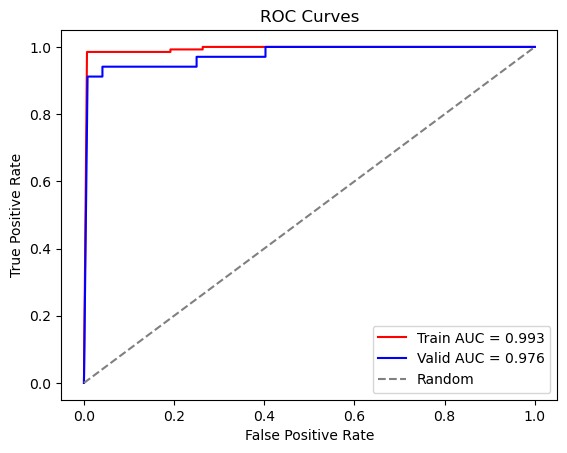

[[2827   27]
 [   3   31]]


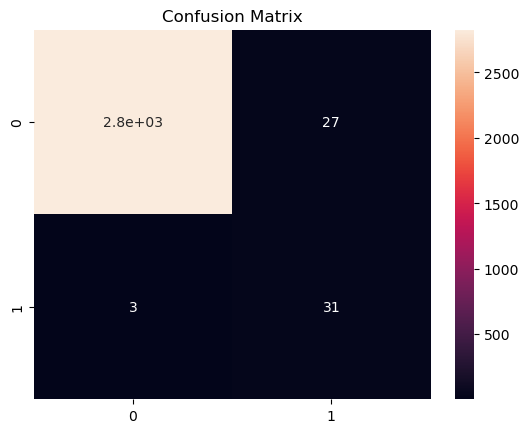

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2854
           1       0.53      0.91      0.67        34

    accuracy                           0.99      2888
   macro avg       0.77      0.95      0.83      2888
weighted avg       0.99      0.99      0.99      2888



In [108]:
nb_best = GaussianNB(priors = None, var_smoothing = 1e-9)
evaluate_best_model(nb_best, X_train_new, y_train, X_valid_new, y_valid)

### Support Vector Machine 

In [109]:
svm = SVC(kernel='rbf', probability=True)

#### Evaluating the model with default parameters

In [110]:
# Call the evaluate_model function
evaluate_model(svm, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 0.994
Valid AUC: 0.973
Macro-Averaged Recall: 0.971


#### Hyperparameter tuning

In [111]:
# Define the parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'class_weight': [None,'balanced'],
    'kernel': ['rgb', 'linear', 'sigmoid']
}

In [112]:
tune_hyperparameters(svm, param_grid_svm, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for SVC:
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Train AUC: 0.999
Valid AUC: 0.975
Macro-Averaged Recall: 0.955


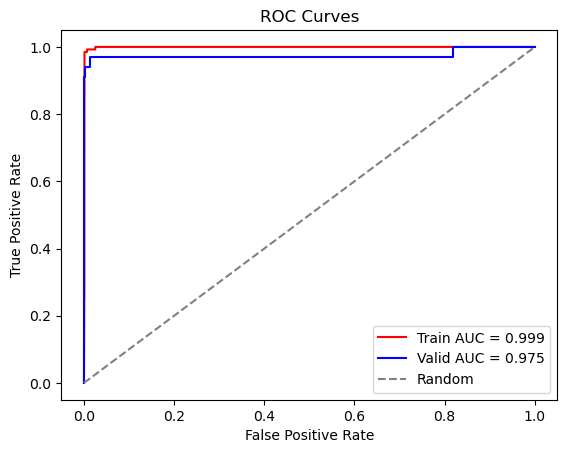

[[2850    4]
 [   3   31]]


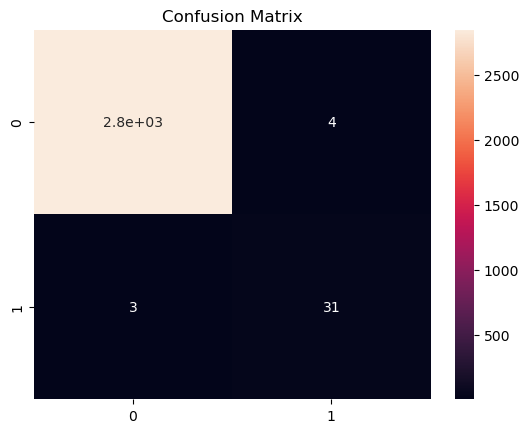

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       0.89      0.91      0.90        34

    accuracy                           1.00      2888
   macro avg       0.94      0.96      0.95      2888
weighted avg       1.00      1.00      1.00      2888



In [113]:
svm_best = SVC(C = 0.1, class_weight = 'balanced', gamma = 'scale', kernel = 'linear', probability = True)
evaluate_best_model(svm_best, X_train_new, y_train, X_valid_new, y_valid)

### Decision Tree

In [114]:
dt = DecisionTreeClassifier()

#### Evaluating the model with default parameters

In [115]:
# Call the evaluate_model function
evaluate_model(dt, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 1.000
Valid AUC: 0.941
Macro-Averaged Recall: 0.941


#### Hyperparameter tuning

In [116]:
# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

In [117]:
tune_hyperparameters(dt, param_grid_dt, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for DecisionTreeClassifier:
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Train AUC: 1.000
Valid AUC: 0.985
Macro-Averaged Recall: 0.941


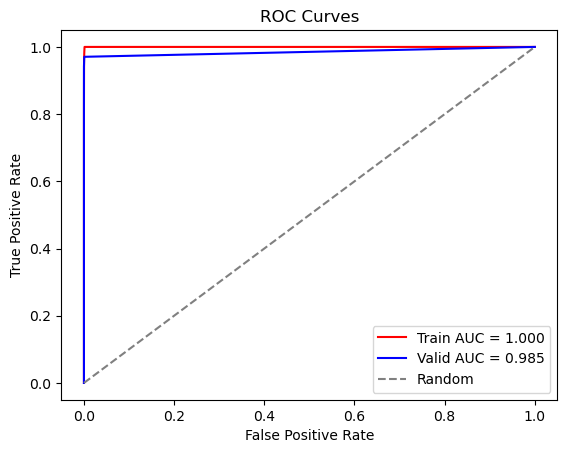

[[2854    0]
 [   2   32]]


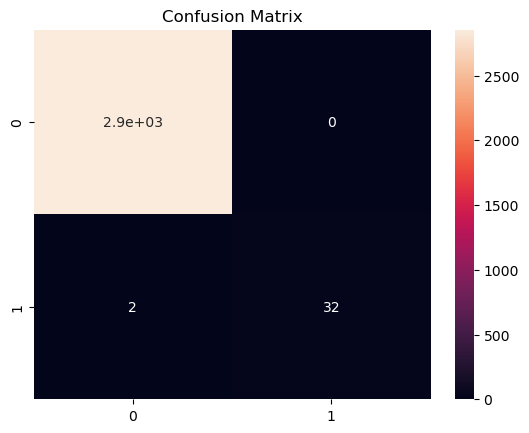

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.94      0.97        34

    accuracy                           1.00      2888
   macro avg       1.00      0.97      0.98      2888
weighted avg       1.00      1.00      1.00      2888



In [118]:
dt_best = DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = None, min_samples_leaf = 1, min_samples_split = 10, splitter = 'random')
evaluate_best_model(dt_best, X_train_new, y_train, X_valid_new, y_valid)

### Random Forest

In [119]:
rf = RandomForestClassifier()

#### Evaluating the model with default parameters

In [120]:
# Call the evaluate_model function
evaluate_model(rf, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 1.000
Valid AUC: 0.985
Macro-Averaged Recall: 0.941


#### Hyperparameter tuning

In [121]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'class_weight': ['balanced', None]
}

In [122]:
tune_hyperparameters(rf, param_grid_rf, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for RandomForestClassifier:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Train AUC: 1.000
Valid AUC: 0.985
Macro-Averaged Recall: 0.956


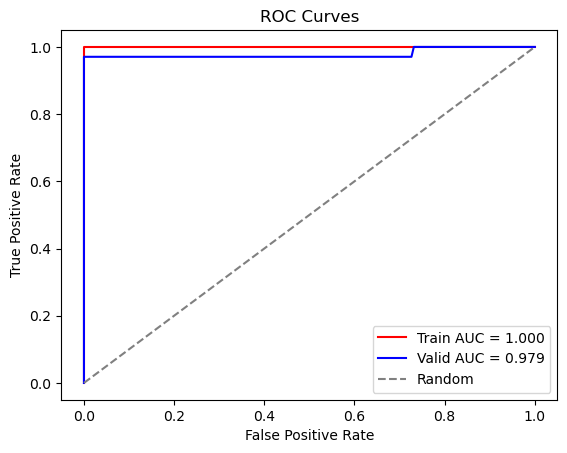

[[2854    0]
 [   3   31]]


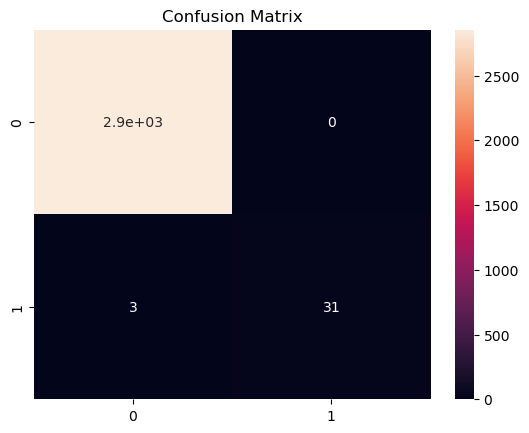

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.91      0.95        34

    accuracy                           1.00      2888
   macro avg       1.00      0.96      0.98      2888
weighted avg       1.00      1.00      1.00      2888



In [123]:
rf_best = RandomForestClassifier(class_weight = None, max_depth = 10, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 100)
evaluate_best_model(rf_best, X_train_new, y_train, X_valid_new, y_valid)

### XGBoost

In [124]:
xgb = XGBClassifier()

#### Evaluating the model with default parameters

In [125]:
# Call the evaluate_model function
evaluate_model(xgb, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 1.000
Valid AUC: 0.973
Macro-Averaged Recall: 0.971


#### Hyperparameter tuning

In [126]:
# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 5]
}

In [127]:
tune_hyperparameters(xgb, param_grid_xgb, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for XGBClassifier:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 0.8}
Train AUC: 1.000
Valid AUC: 0.979
Macro-Averaged Recall: 0.985


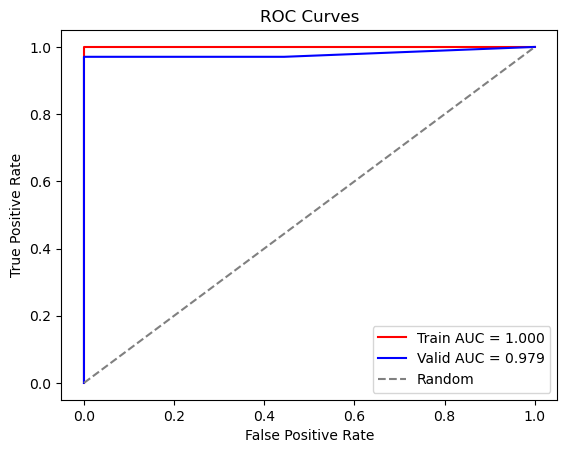

[[2854    0]
 [   1   33]]


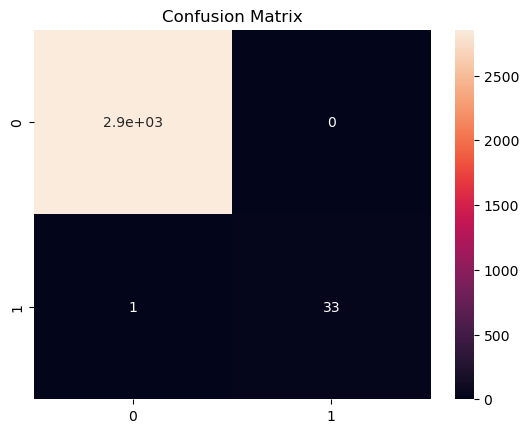

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.97      0.99        34

    accuracy                           1.00      2888
   macro avg       1.00      0.99      0.99      2888
weighted avg       1.00      1.00      1.00      2888



In [128]:
xgb_best = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 3, n_estimators = 100, scale_pos_weight = 5, subsample = 0.8)
evaluate_best_model(xgb_best, X_train_new, y_train, X_valid_new, y_valid)

## Supervised Deep Learning

In this section, I will train and optimize the hyperparameters of a Deep Neural Network. I tried three types, with one, two and three hidden layers respectively. 

### 1 hidden layer

In [100]:
X_train_new.shape

(11548, 10)

In [101]:
# Define the DNN model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_new.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [102]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [103]:
# Define a function to build the model with hyperparameters
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train_new.shape[1],)))

    # Tune the number of units in the dense layer
    hp_units_layer = hp.Int('units_layer', min_value=2, max_value=8, step=2)
    model.add(keras.layers.Dense(units=hp_units_layer, activation='relu'))

    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy', metrics=[keras.metrics.AUC()])

    return model

In [104]:
# Initialize the tuner 
tuner = kt.RandomSearch(build_model,
                        objective = Objective('val_auc', direction='max'),
                        max_trials= 10,
                        directory=r'C:\Users\l.baltaji\Desktop\Capstone Project\Methodology and Source Code',  # Change to a directory where you want to save the results
                        project_name='hyperparameter_tuning1',
                       overwrite = True)

In [105]:
# Perform the hyperparameter search
tuner.search(X_train_new, y_train, epochs=10, validation_data=(X_valid_new, y_valid))

Trial 10 Complete [00h 00m 15s]
val_auc: 0.9788737893104553

Best val_auc So Far: 0.984387218952179
Total elapsed time: 00h 02m 42s
INFO:tensorflow:Oracle triggered exit


In [106]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [107]:
print("Best Hyperparameters:")
print("Units in the first dense layer:", best_hps.get('units_layer'))
print("Learning rate:", best_hps.get('learning_rate'))

Best Hyperparameters:
Units in the first dense layer: 4
Learning rate: 0.01


In [108]:
# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [109]:
# Train the final model and get the training history
history = final_model.fit(X_train_new, y_train, epochs=50, validation_data=(X_valid_new, y_valid))

Epoch 1/50
361/361 [==============================] - 3s 5ms/step - loss: 0.1285 - auc_1: 0.7648 - val_loss: 0.0313 - val_auc_1: 0.9132
Epoch 2/50
361/361 [==============================] - 1s 4ms/step - loss: 0.0173 - auc_1: 0.9895 - val_loss: 0.0192 - val_auc_1: 0.9683
Epoch 3/50
361/361 [==============================] - 1s 4ms/step - loss: 0.0100 - auc_1: 0.9883 - val_loss: 0.0141 - val_auc_1: 0.9700
Epoch 4/50
361/361 [==============================] - 1s 4ms/step - loss: 0.0069 - auc_1: 0.9960 - val_loss: 0.0109 - val_auc_1: 0.9701
Epoch 5/50
361/361 [==============================] - 1s 4ms/step - loss: 0.0061 - auc_1: 0.9886 - val_loss: 0.0095 - val_auc_1: 0.9701
Epoch 6/50
361/361 [==============================] - 1s 4ms/step - loss: 0.0064 - auc_1: 0.9885 - val_loss: 0.0091 - val_auc_1: 0.9703
Epoch 7/50
361/361 [==============================] - 1s 4ms/step - loss: 0.0081 - auc_1: 0.9884 - val_loss: 0.0111 - val_auc_1: 0.9556
Epoch 8/50
361/361 [============================

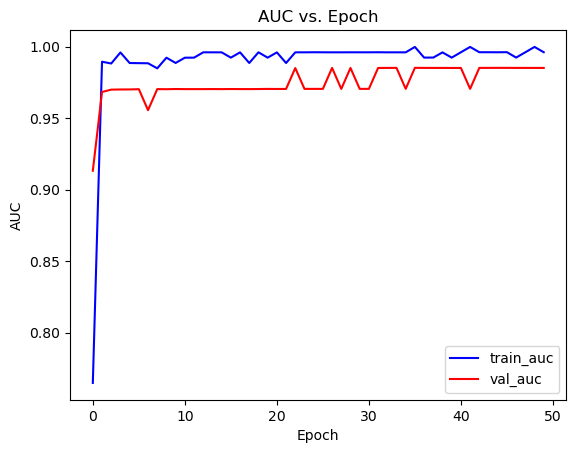

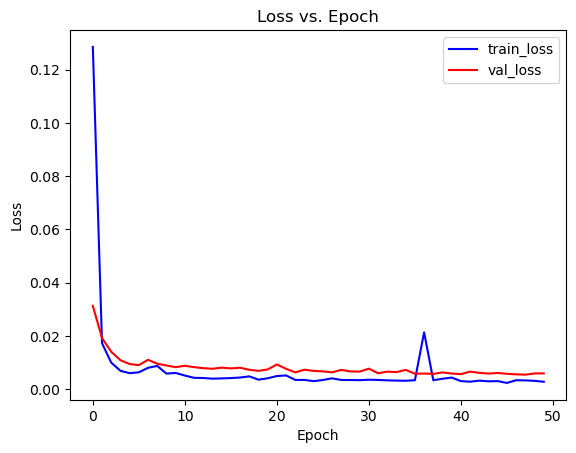

In [110]:
# Plot the AUC-epoch graph
plt.plot(history.history['auc_1'], label='train_auc', color='blue')
plt.plot(history.history['val_auc_1'], label='val_auc', color='red')
plt.title('AUC vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Plot the loss-epoch graph
plt.plot(history.history['loss'], label='train_loss', color='blue')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

91/91 [==============================] - 0s 2ms/step


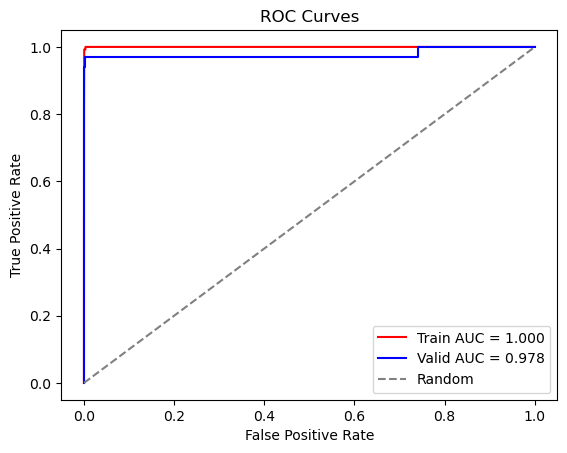

In [111]:
# Predict probabilities on train and valid sets
y_train_scores = final_model.predict(X_train_new)
y_valid_scores = final_model.predict(X_valid_new)

# Extract the probability for the positive class (class 1)
y_train_scores = y_train_scores[:, 0]
y_valid_scores = y_valid_scores[:, 0]

# Calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# Calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# Plot ROC curves
plt.plot(train_fpr, train_tpr, '-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr, '-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

91/91 [==============================] - 0s 2ms/step
[[2854    0]
 [   2   32]]


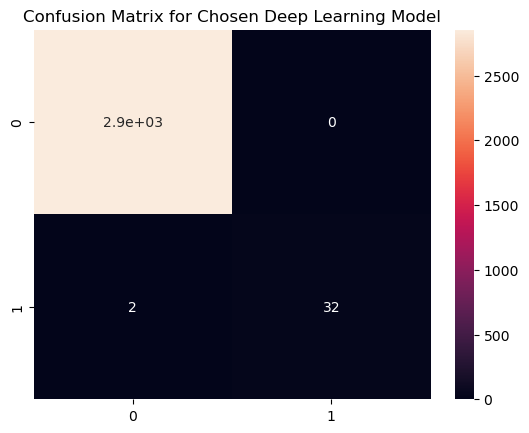

In [112]:
# Confusion Matrix
y_pred_values = final_model.predict(X_valid_new)
y_pred_classes = (y_pred_values > 0.5).astype(int)
cf_matrix = confusion_matrix(y_valid, y_pred_classes)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix for Chosen Deep Learning Model')
plt.show()

In [113]:
# Calculate the classification report
print(classification_report(y_valid, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.94      0.97        34

    accuracy                           1.00      2888
   macro avg       1.00      0.97      0.98      2888
weighted avg       1.00      1.00      1.00      2888



### 2 hidden layers

In [114]:
# Define the DNN model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_new.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [115]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [116]:
# Define a function to build the model with hyperparameters
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train_new.shape[1],)))

    # Tune the number of units in the first dense layer
    hp_units_layer1 = hp.Int('units_layer1', min_value=4, max_value=8, step=2)
    model.add(keras.layers.Dense(units=hp_units_layer1, activation='relu'))

    # Tune the number of units in the second dense layer
    hp_units_layer2 = hp.Int('units_layer2', min_value=2, max_value=4, step=2)
    model.add(keras.layers.Dense(units=hp_units_layer2, activation='relu'))

    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy', metrics=[keras.metrics.AUC()])

    return model

In [117]:
# Initialize the tuner 
tuner = kt.RandomSearch(build_model,
                        objective = Objective('val_auc', direction='max'),
                        max_trials= 10,
                        directory=r'C:\Users\l.baltaji\Desktop\Capstone Project\Methodology and Source Code',  
                        project_name='hyperparameter_tuning2',
                       overwrite = True)

In [118]:
# Perform the hyperparameter search
tuner.search(X_train_new, y_train, epochs=10, validation_data=(X_valid_new, y_valid))

Trial 9 Complete [00h 00m 20s]
val_auc: 0.9703202247619629

Best val_auc So Far: 0.9850828051567078
Total elapsed time: 00h 02m 43s
INFO:tensorflow:Oracle triggered exit


In [119]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [120]:
print("Best Hyperparameters:")
print("Units in the first dense layer:", best_hps.get('units_layer1'))
print("Units in the first dense layer:", best_hps.get('units_layer2'))
print("Learning rate:", best_hps.get('learning_rate'))

Best Hyperparameters:
Units in the first dense layer: 8
Units in the first dense layer: 2
Learning rate: 0.01


In [121]:
# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [122]:
# Train the final model and get the training history
history2 = final_model.fit(X_train_new, y_train, epochs=50, validation_data=(X_valid_new, y_valid))

Epoch 1/50
361/361 [==============================] - 4s 6ms/step - loss: 0.2844 - auc_1: 0.5464 - val_loss: 0.1229 - val_auc_1: 0.5289
Epoch 2/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0852 - auc_1: 0.7188 - val_loss: 0.0668 - val_auc_1: 0.6463
Epoch 3/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0508 - auc_1: 0.7542 - val_loss: 0.0537 - val_auc_1: 0.6452
Epoch 4/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0438 - auc_1: 0.7601 - val_loss: 0.0497 - val_auc_1: 0.6594
Epoch 5/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0404 - auc_1: 0.7601 - val_loss: 0.0491 - val_auc_1: 0.6461
Epoch 6/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0382 - auc_1: 0.7612 - val_loss: 0.0481 - val_auc_1: 0.6557
Epoch 7/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0375 - auc_1: 0.7592 - val_loss: 0.0487 - val_auc_1: 0.6606
Epoch 8/50
361/361 [============================

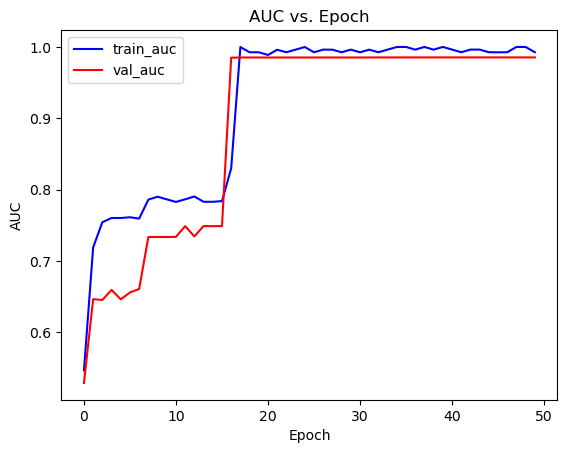

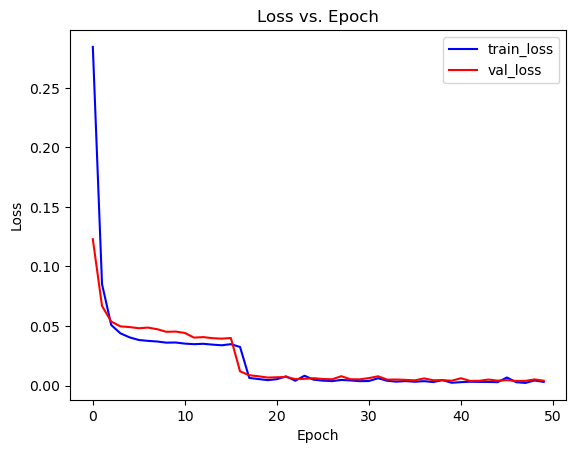

In [123]:
# Plot the AUC-epoch graph
plt.plot(history2.history['auc_1'], label='train_auc', color='blue')
plt.plot(history2.history['val_auc_1'], label='val_auc', color='red')
plt.title('AUC vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Plot the loss-epoch graph
plt.plot(history2.history['loss'], label='train_loss', color='blue')
plt.plot(history2.history['val_loss'], label='val_loss', color='red')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

91/91 [==============================] - 0s 3ms/step


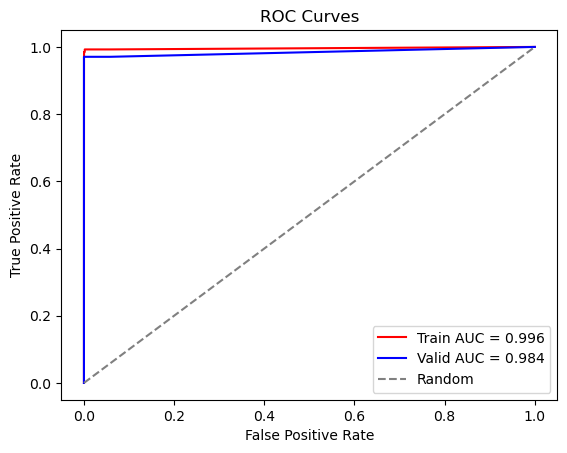

In [124]:
# Predict probabilities on train and valid sets
y_train_scores = final_model.predict(X_train_new)
y_valid_scores = final_model.predict(X_valid_new)

# Extract the probability for the positive class (class 1)
y_train_scores = y_train_scores[:, 0]
y_valid_scores = y_valid_scores[:, 0]

# Calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# Calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# Plot ROC curves
plt.plot(train_fpr, train_tpr, '-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr, '-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

91/91 [==============================] - 0s 2ms/step
[[2854    0]
 [   1   33]]


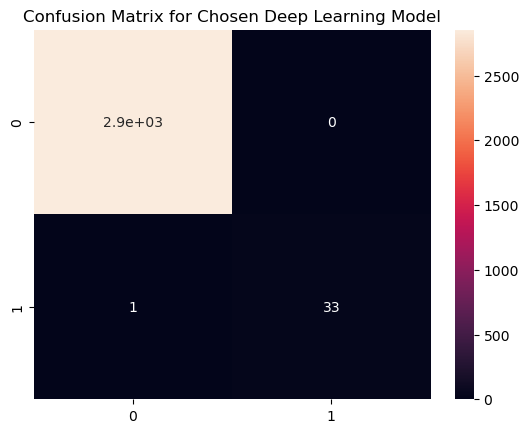

In [125]:
# Confusion Matrix
y_pred_values = final_model.predict(X_valid_new)
y_pred_classes = (y_pred_values > 0.5).astype(int)
cf_matrix = confusion_matrix(y_valid, y_pred_classes)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix for Chosen Deep Learning Model')
plt.show()

In [126]:
# Calculate the classification report
print(classification_report(y_valid, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.97      0.99        34

    accuracy                           1.00      2888
   macro avg       1.00      0.99      0.99      2888
weighted avg       1.00      1.00      1.00      2888



### 3 hidden layers

In [127]:
# Define the DNN model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_new.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [128]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [129]:
# Define a function to build the model with hyperparameters
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train_new.shape[1],)))

    # Tune the number of units in the first hidden layer
    hp_units_layer1 = hp.Int('units_layer1', min_value=6, max_value=8, step=2)
    model.add(keras.layers.Dense(units=hp_units_layer1, activation='relu'))

    # Tune the number of units in the second hidden layer
    hp_units_layer2 = hp.Int('units_layer2', min_value=4, max_value=6, step=2)
    model.add(keras.layers.Dense(units=hp_units_layer2, activation='relu'))

    # Tune the number of units in the third hidden layer
    hp_units_layer3 = hp.Int('units_layer3', min_value=2, max_value=4, step=2)
    model.add(keras.layers.Dense(units=hp_units_layer3, activation='relu'))

    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy', metrics=[keras.metrics.AUC()])

    return model

In [130]:
# Initialize the tuner 
tuner = kt.RandomSearch(build_model,
                        objective = Objective('val_auc', direction='max'),
                        max_trials= 10,
                        directory=r'C:\Users\l.baltaji\Desktop\Capstone Project\Methodology and Source Code',  # Change to a directory where you want to save the results
                        project_name='hyperparameter_tuning3',
                       overwrite = True)

In [131]:
# Perform the hyperparameter search
tuner.search(X_train_new, y_train, epochs=10, validation_data=(X_valid_new, y_valid))

Trial 10 Complete [00h 00m 23s]
val_auc: 0.6385052800178528

Best val_auc So Far: 0.9851910471916199
Total elapsed time: 00h 03m 31s
INFO:tensorflow:Oracle triggered exit


In [132]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [133]:
print("Best Hyperparameters:")
print("Units in the first dense layer:", best_hps.get('units_layer1'))
print("Units in the second dense layer:", best_hps.get('units_layer2'))
print("Units in the third dense layer:", best_hps.get('units_layer3'))
print("Learning rate:", best_hps.get('learning_rate'))

Best Hyperparameters:
Units in the first dense layer: 8
Units in the second dense layer: 4
Units in the third dense layer: 4
Learning rate: 0.01


In [134]:
# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [135]:
# Train the final model and get the training history
history3 = final_model.fit(X_train_new, y_train, epochs=50, validation_data=(X_valid_new, y_valid))

Epoch 1/50
361/361 [==============================] - 5s 6ms/step - loss: 0.0889 - auc_1: 0.9068 - val_loss: 0.0158 - val_auc_1: 0.9704
Epoch 2/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0093 - auc_1: 0.9959 - val_loss: 0.0093 - val_auc_1: 0.9705
Epoch 3/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0068 - auc_1: 0.9921 - val_loss: 0.0080 - val_auc_1: 0.9705
Epoch 4/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0039 - auc_1: 0.9961 - val_loss: 0.0071 - val_auc_1: 0.9705
Epoch 5/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0035 - auc_1: 0.9961 - val_loss: 0.0069 - val_auc_1: 0.9705
Epoch 6/50
361/361 [==============================] - 2s 6ms/step - loss: 0.0034 - auc_1: 0.9961 - val_loss: 0.0084 - val_auc_1: 0.9705
Epoch 7/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0037 - auc_1: 0.9961 - val_loss: 0.0084 - val_auc_1: 0.9705
Epoch 8/50
361/361 [============================

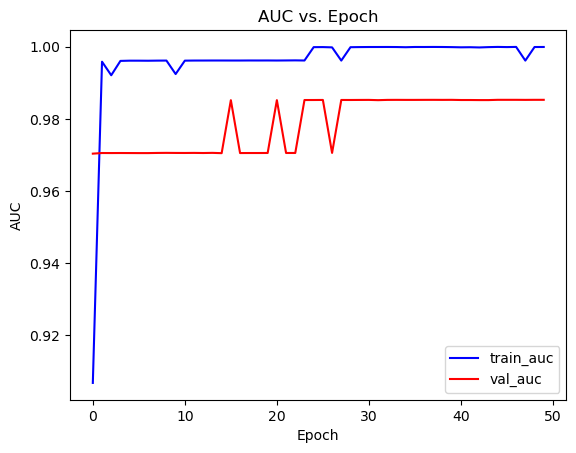

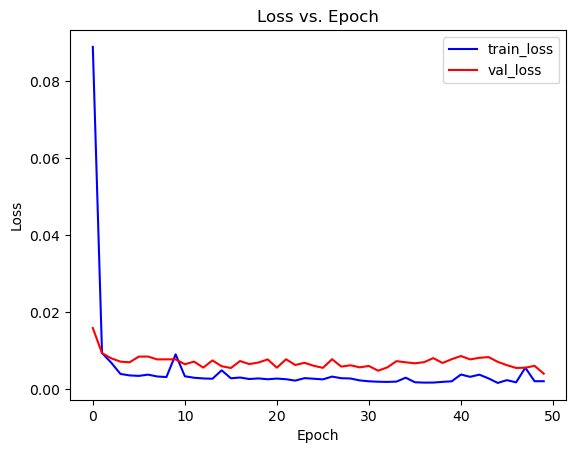

In [136]:
# Plot the AUC-epoch graph
plt.plot(history3.history['auc_1'], label='train_auc', color='blue')
plt.plot(history3.history['val_auc_1'], label='val_auc', color='red')
plt.title('AUC vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Plot the loss-epoch graph
plt.plot(history3.history['loss'], label='train_loss', color='blue')
plt.plot(history3.history['val_loss'], label='val_loss', color='red')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

91/91 [==============================] - 0s 3ms/step


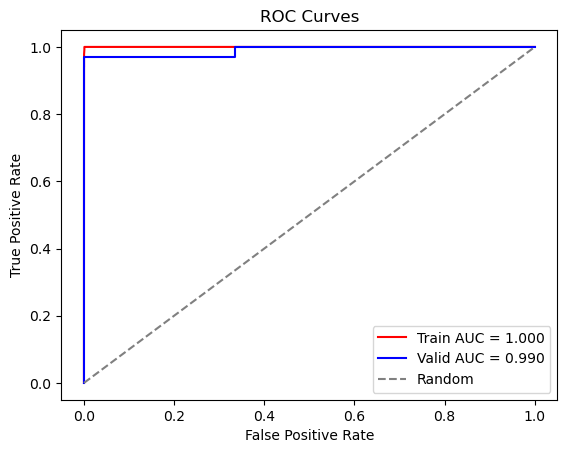

In [137]:
# Predict probabilities on train and valid sets
y_train_scores = final_model.predict(X_train_new)
y_valid_scores = final_model.predict(X_valid_new)

# Extract the probability for the positive class (class 1)
y_train_scores = y_train_scores[:, 0]
y_valid_scores = y_valid_scores[:, 0]

# Calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# Calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# Plot ROC curves
plt.plot(train_fpr, train_tpr, '-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr, '-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

91/91 [==============================] - 0s 3ms/step
[[2854    0]
 [   1   33]]


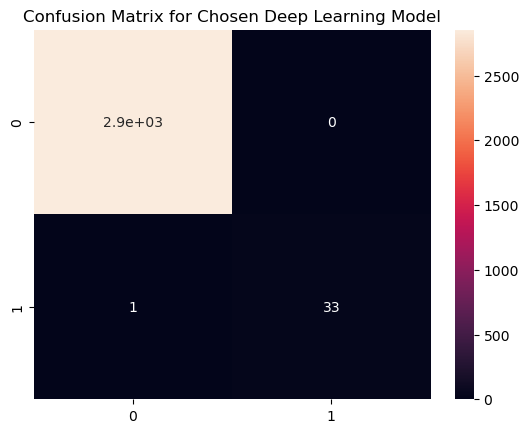

In [138]:
# Confusion Matrix
y_pred_values = final_model.predict(X_valid_new)
y_pred_classes = (y_pred_values > 0.5).astype(int)
cf_matrix = confusion_matrix(y_valid, y_pred_classes)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix for Chosen Deep Learning Model')
plt.show()

In [139]:
# Calculate the classification report
print(classification_report(y_valid, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2854
           1       1.00      0.97      0.99        34

    accuracy                           1.00      2888
   macro avg       1.00      0.99      0.99      2888
weighted avg       1.00      1.00      1.00      2888



## Unsupervised Machine Learning

In [88]:
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    # Fit the model
    model.fit(X_train)
    
    # Binary Labels of the training data: 0 for normal, 1 for anomalies
    y_train_pred = model.labels_
    
    # the outlier scores of the training data
    y_train_scores = model.decision_scores_
    
    # Predict if a particular sample is an outlier
    y_valid_pred = model.predict(X_valid)
    
    # Predict raw anomaly score of the transaction
    y_valid_scores = model.decision_function(X_valid)
    
    # Predict the probability of a sample being an outlier
    y_valid_proba = model.predict_proba(X_valid)

    # Calculate AUC scores on train and validation sets
    train_auc = roc_auc_score(y_train, y_train_scores)
    valid_auc = roc_auc_score(y_valid, y_valid_scores)

    # Calculate macro-averaged recall for validation data
    y_valid_pred_labels = model.predict(X_valid)
    valid_recall = recall_score(y_valid, y_valid_pred_labels, average='macro')

    # Display Train AUC, Valid AUC, and Macro-Averaged Recall
    print(f'Train AUC: {train_auc:.3f}')
    print(f'Valid AUC: {valid_auc:.3f}')
    print(f'Macro-Averaged Recall: {valid_recall:.3f}')

In [89]:
# Function for tuning the hyperparameters of a model. The metric used for scoring is the ROC-AUC
def tune_hyperparameters(model, param_grid, X_train, y_train, X_valid, y_valid):
    gs = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
    
    gs.fit(X_train)

    best_model = gs.best_estimator_
    
    # Predict if a particular sample is an outlier
    y_train_pred = best_model.predict(X_train)
    
    # The outlier scores of the training data
    y_train_scores = best_model.decision_scores_
    
    # Predict if a particular sample is an outlier
    y_valid_pred = best_model.predict(X_valid)
    
    # Predict raw anomaly score of the transaction
    y_valid_scores = best_model.decision_function(X_valid)
    
    # Calculate AUC scores on train and validation sets
    train_auc = roc_auc_score(y_train, y_train_scores)
    valid_auc = roc_auc_score(y_valid, y_valid_scores)
    
    # Calculate macro-averaged recall for validation data
    valid_recall = recall_score(y_valid, y_valid_pred, average='macro')

    # Print the best hyperparameters, AUC scores, and macro-averaged recall for the model
    print(f'Best Hyperparameters for {model.__class__.__name__}:\n{gs.best_params_}')
    print(f'Train AUC: {train_auc:.3f}')
    print(f'Valid AUC: {valid_auc:.3f}')
    print(f'Macro-Averaged Recall: {valid_recall:.3f}')

In [90]:
def evaluate_best_model2(model, X_train, y_train, X_valid, y_valid):
    # Fit the model
    model.fit(X_train)
    
    # Binary Labels of the training data: 0 for normal, 1 for anomalies
    y_train_pred = model.labels_
    
    # the outlier scores of the training data
    y_train_scores = model.decision_scores_
    
    # Predict if a particular sample is an outlier
    y_valid_pred = model.predict(X_valid)
    
    # Predict raw anomaly score of the transaction
    y_valid_scores = model.decision_function(X_valid)
    
    # Predict the probability of a sample being an outlier
    y_valid_proba = model.predict_proba(X_valid)

    # calculate AUC scores on train and valid sets
    train_auc = roc_auc_score(y_train, y_train_scores)
    valid_auc = roc_auc_score(y_valid, y_valid_scores)

    # calculate false positive rates and true positive rates for ROC curves
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
    valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)
    
    sns.set_style('white')
    sns.color_palette()
    # plot ROC curves
    plt.plot(train_fpr, train_tpr,'red', label=f"Train AUC = {train_auc:.3f}")
    plt.plot(valid_fpr, valid_tpr,'blue',  label=f"Valid AUC = {valid_auc:.3f}")
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc = 'lower right')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cf_matrix = confusion_matrix(y_valid, y_valid_pred)
    print(cf_matrix)
    sns.heatmap(cf_matrix, annot = True)
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(y_valid, y_valid_pred))

### Isolation Forest

In [171]:
isf = IForest(random_state = 42)

#### Evaluating the model with default parameters

In [172]:
evaluate_model(isf, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 0.926
Valid AUC: 0.861
Macro-Averaged Recall: 0.802


#### Hyperparameter Tuning

In [173]:
param_grid_isf = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.1, 0.2, 0.3],
    'contamination': [0.01, 0.05, 0.1]
}

In [174]:
tune_hyperparameters(isf, param_grid_isf, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for IForest:
{'contamination': 0.01, 'max_samples': 0.1, 'n_estimators': 100}
Train AUC: 0.996
Valid AUC: 0.965
Macro-Averaged Recall: 0.629


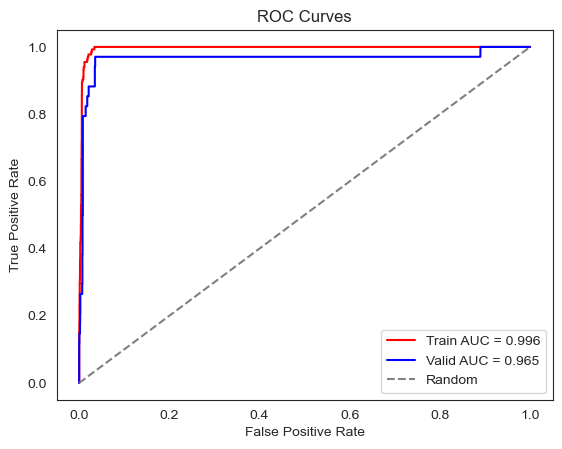

[[2836   18]
 [  25    9]]


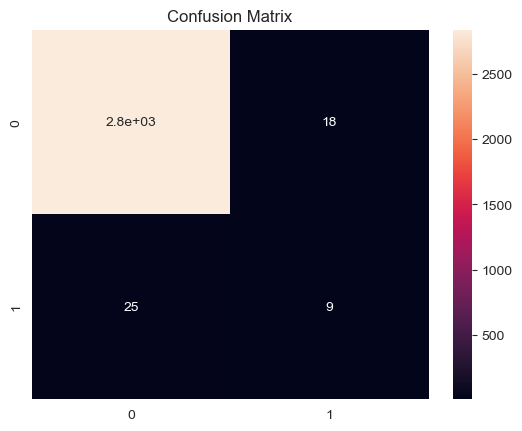

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2854
           1       0.33      0.26      0.30        34

    accuracy                           0.99      2888
   macro avg       0.66      0.63      0.64      2888
weighted avg       0.98      0.99      0.98      2888



In [91]:
isf_best = IForest(random_state = 42, contamination = 0.01, max_samples = 0.1, n_estimators = 100)
evaluate_best_model2(isf_best, X_train_new, y_train, X_valid_new, y_valid)

In [92]:
# Calculate the anomaly scores for X_valid_new
anomaly_scores = -isf_best.decision_function(X_valid_new)

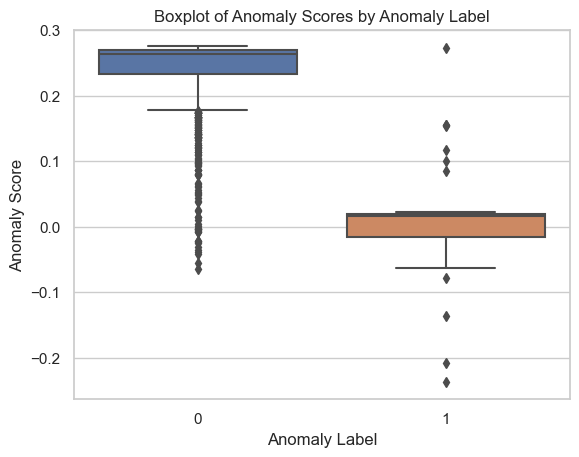

In [93]:
# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_valid, pd.DataFrame):
    y_valid = y_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores,
    'Anomaly_Label': y_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='Anomaly_Label', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Label')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Label')

# Show the plot
plt.show()

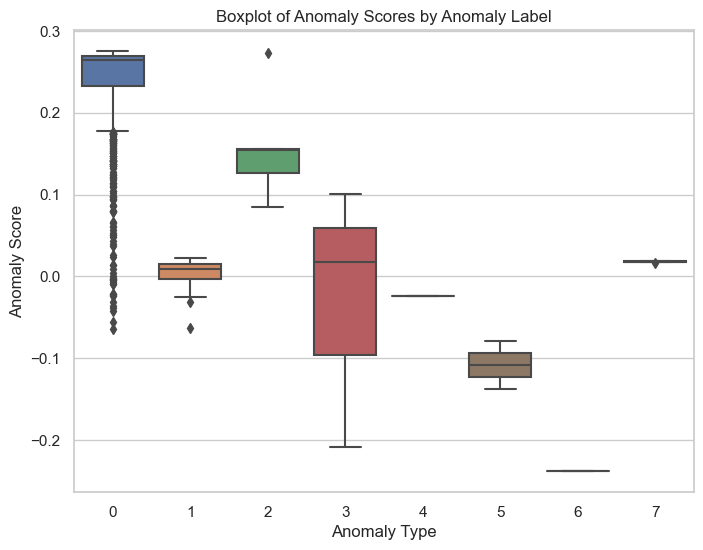

In [94]:
# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_type_valid, pd.DataFrame):
    y_type_valid = y_type_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores,
    'Anomaly_Type': y_type_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Anomaly_Type', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Type')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Label')

# Show the plot
plt.show()

### Local Outlier Factor

In [208]:
lof = LOF()

In [209]:
# Print model parameters
for key, value in lof.get_params().items():
    print(f"{key}: {value}")

algorithm: auto
contamination: 0.1
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: 1
n_neighbors: 20
novelty: True
p: 2


#### Evaluating the model with default parameters

In [210]:
evaluate_model(lof, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 0.719
Valid AUC: 0.655
Macro-Averaged Recall: 0.714


#### Hyperparameter Tuning

In [211]:
param_grid_lof = {
        'contamination': [0.1, 0.01, 0.001],
        'n_neighbors':[20]
    }

In [212]:
tune_hyperparameters(lof, param_grid_lof, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for LOF:
{'contamination': 0.1, 'n_neighbors': 20}
Train AUC: 0.719
Valid AUC: 0.655
Macro-Averaged Recall: 0.714


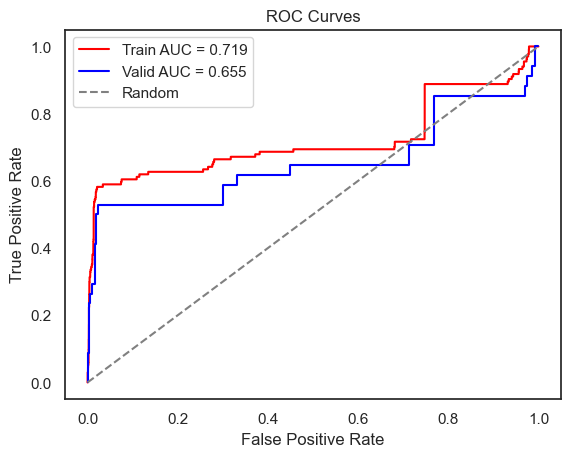

[[2567  287]
 [  16   18]]


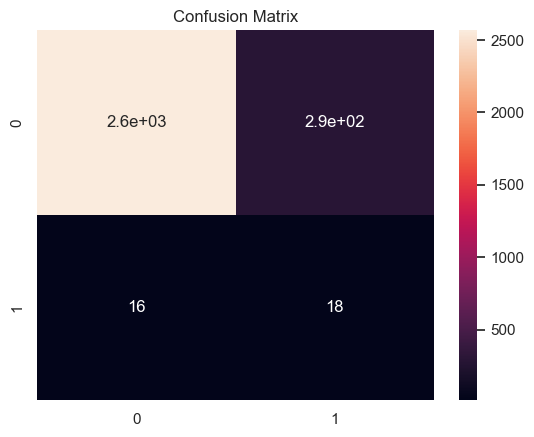

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2854
           1       0.06      0.53      0.11        34

    accuracy                           0.90      2888
   macro avg       0.53      0.71      0.53      2888
weighted avg       0.98      0.90      0.93      2888



In [95]:
lof_best = LOF(contamination = 0.1, n_neighbors = 20)
evaluate_best_model2(lof_best, X_train_new, y_train, X_valid_new, y_valid)

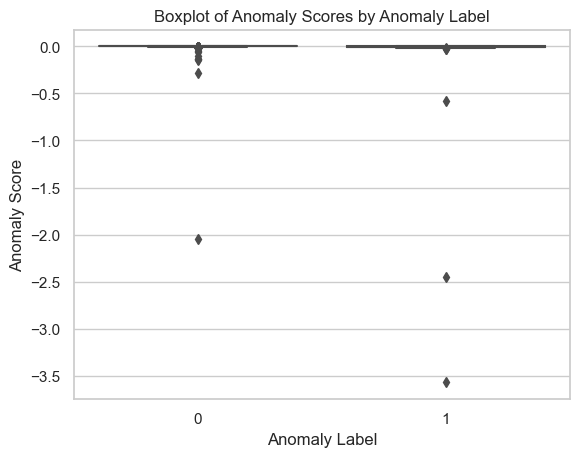

In [96]:
# Calculate the anomaly scores for X_valid_new
anomaly_scores = -lof_best.decision_function(X_valid_new)/1000

# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_valid, pd.DataFrame):
    y_valid = y_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores,
    'Anomaly_Label': y_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='Anomaly_Label', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Label')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Label')

# Show the plot
plt.show()

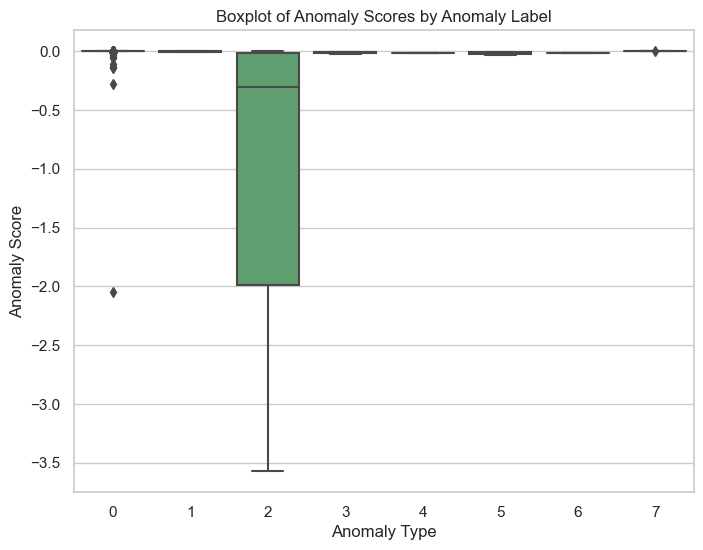

In [97]:
# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_type_valid, pd.DataFrame):
    y_type_valid = y_type_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores,
    'Anomaly_Type': y_type_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Anomaly_Type', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Type')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Label')

# Show the plot
plt.show()

### One Class SVM

In [222]:
oc_svm = OCSVM()

In [223]:
# Print model parameters
for key, value in oc_svm.get_params().items():
    print(f"{key}: {value}")

cache_size: 200
coef0: 0.0
contamination: 0.1
degree: 3
gamma: auto
kernel: rbf
max_iter: -1
nu: 0.5
shrinking: True
tol: 0.001
verbose: False


#### Evaluating the model with default parameters

In [224]:
evaluate_model(oc_svm, X_train_new, y_train, X_valid_new, y_valid)

Train AUC: 0.991
Valid AUC: 0.976
Macro-Averaged Recall: 0.924


#### Hyperparameter Tuning

In [225]:
param_grid_oc_svm = {
        'contamination' :[0.1, 0.01],
        'gamma': ['auto', 'scale']
    }

In [226]:
tune_hyperparameters(oc_svm, param_grid_oc_svm, X_train_new, y_train, X_valid_new, y_valid)

Best Hyperparameters for OCSVM:
{'contamination': 0.1, 'gamma': 'auto'}
Train AUC: 0.991
Valid AUC: 0.976
Macro-Averaged Recall: 0.924


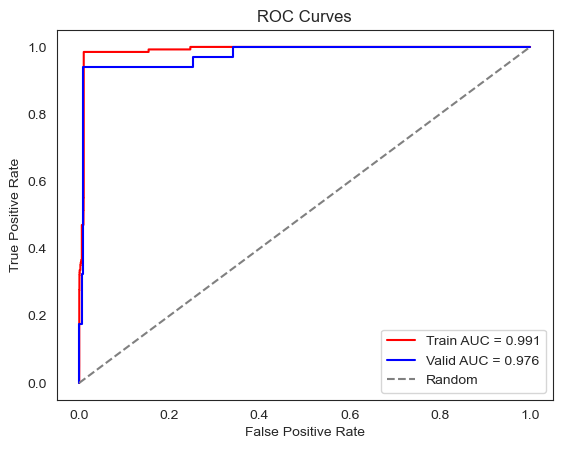

[[2590  264]
 [   2   32]]


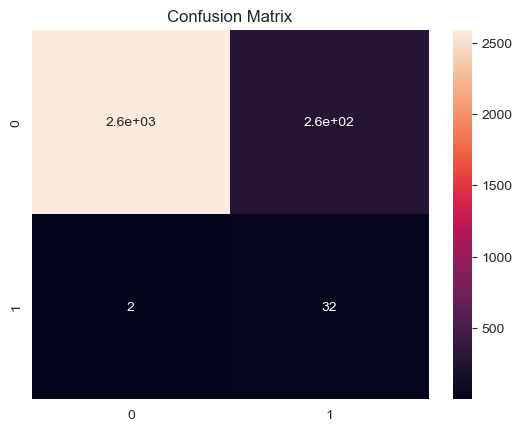

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2854
           1       0.11      0.94      0.19        34

    accuracy                           0.91      2888
   macro avg       0.55      0.92      0.57      2888
weighted avg       0.99      0.91      0.94      2888



In [261]:
ocsvm_best = OCSVM(contamination = 0.1,gamma = 'auto')
sns.set_style('white')

evaluate_best_model2(ocsvm_best, X_train_new, y_train, X_valid_new, y_valid)

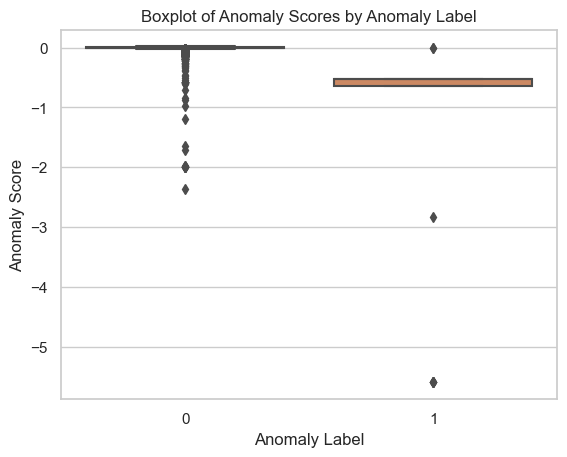

In [228]:
# Calculate the anomaly scores for X_valid_new
anomaly_scores = -ocsvm_best.decision_function(X_valid_new)/1000

# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_valid, pd.DataFrame):
    y_valid = y_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores,
    'Anomaly_Label': y_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='Anomaly_Label', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Label')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Label')

# Show the plot
plt.show()

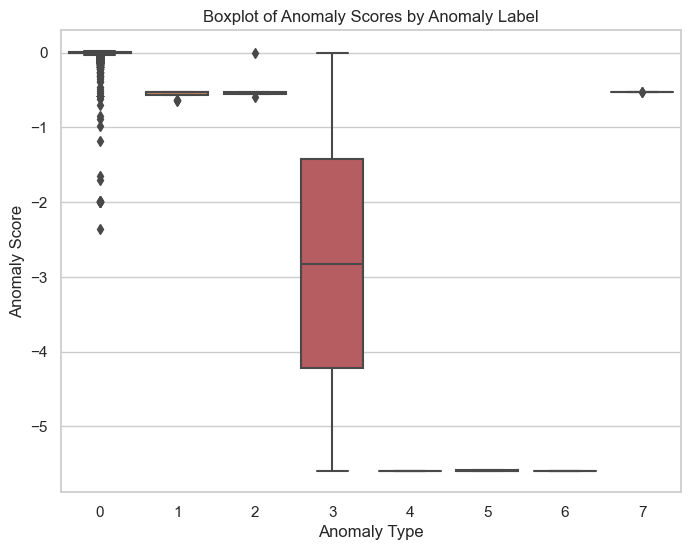

In [229]:
# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_type_valid, pd.DataFrame):
    y_type_valid = y_type_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores,
    'Anomaly_Type': y_type_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Anomaly_Type', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Type')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Label')

# Show the plot
plt.show()

## Unsupervised Deep Learning: Auto-Encoders

In [140]:
# Convert y_train to a pandas Series if it's a DataFrame column
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]

In [188]:
# Keep only the normal data for the training of the autoencoder
mask = (y_train == 0)

X_train_normal = X_train_new[mask]

In [189]:
# Input Layer
input = tf.keras.layers.Input(shape=(X_train_normal.shape[1],))

# Encoder Layers
encoder = tf.keras.Sequential([
    layers.Dense(8, activation = 'relu'),
    layers.Dense(6, activation = 'relu'),
    layers.Dense(4, activation = 'relu')
])(input)

# Decoder Layers
decoder = tf.keras.Sequential([
    layers.Dense(6, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(X_train_normal.shape[1], activation = 'sigmoid')
])(encoder)

# Create the autoencoder
autoencoder = keras.Model(inputs = input, outputs = decoder)

In [190]:
# Compile the autoencoder
autoencoder.compile(optimizer = 'adam', loss = 'mae')

In [191]:
# Fit the autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal,
                         epochs = 20, 
                         batch_size = 64,
                         validation_data = (X_valid_new, X_valid_new),
                         shuffle = True)

Epoch 1/20
179/179 [==============================] - 1s 3ms/step - loss: 0.3997 - val_loss: 0.1650
Epoch 2/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0426
Epoch 3/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0370 - val_loss: 0.0405
Epoch 4/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0358 - val_loss: 0.0398
Epoch 5/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.0396
Epoch 6/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0353 - val_loss: 0.0395
Epoch 7/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.0394
Epoch 8/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.0394
Epoch 9/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.0393
Epoch 10/20
179/179 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.0393

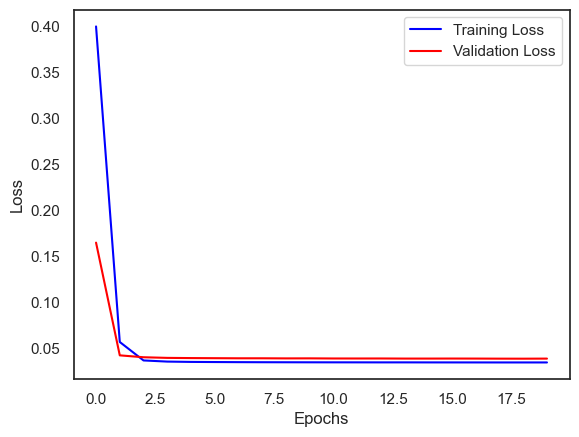

In [205]:
sns.set(style="white")
# Loss-Epochs Plot
plt.plot(history.history['loss'], label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [195]:
# Predict anomalies in the training dataset
prediction = autoencoder.predict(X_valid_new)

# Get the mean absolute error between actual and reconstruction/prediction
prediction_loss = tf.keras.losses.mae(prediction, X_valid_new)

# Check the prediction loss threshold for 3% of outliers
loss_threshold = np.percentile(prediction_loss, 97)
print(f'The prediction loss threshold for 3% of anomalies is {loss_threshold: .2f}')

91/91 [==============================] - 0s 1ms/step
The prediction loss threshold for 3% of anomalies is  0.09


In [196]:
# Check the model performance at 2% threshold
threshold_prediction = [0 if i<loss_threshold else 1 for i in prediction_loss]

361/361 [==============================] - 0s 1ms/step


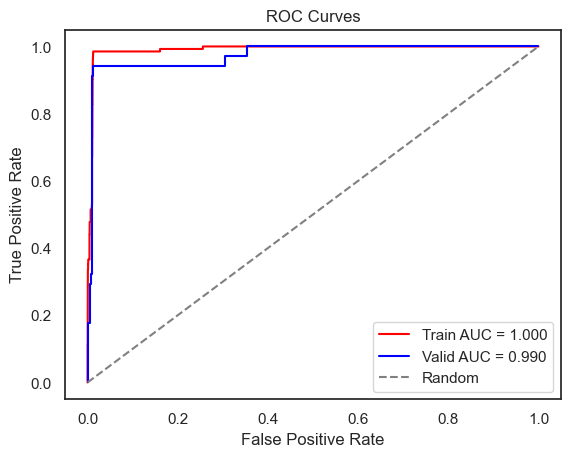

In [197]:
sns.set(style="white")
# Predict anomalies in the training dataset
prediction2 = autoencoder.predict(X_train_new)

# Get the mean absolute error between actual and reconstruction/prediction
prediction_loss2 = tf.keras.losses.mae(prediction2, X_train_new)

# Check the prediction loss threshold for 2% of outliers
loss_threshold = np.percentile(prediction_loss2, 98)

# Calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, prediction_loss2)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, prediction_loss)

# Plot ROC curves
plt.plot(train_fpr, train_tpr, 'red', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr, 'blue',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

[[2799   55]
 [   2   32]]


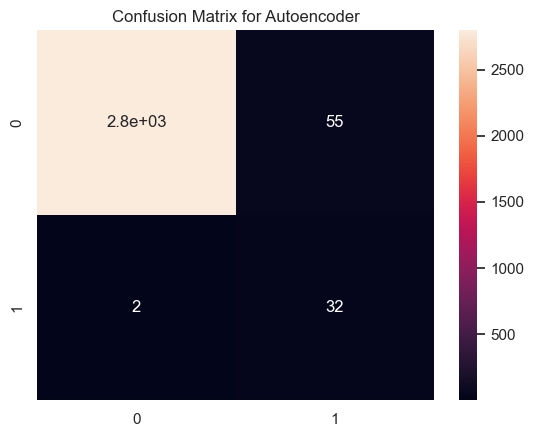

In [198]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, threshold_prediction)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix for Autoencoder')
plt.show()

In [199]:
# Check the prediction performance
print(classification_report(y_valid, threshold_prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2854
           1       0.37      0.94      0.53        34

    accuracy                           0.98      2888
   macro avg       0.68      0.96      0.76      2888
weighted avg       0.99      0.98      0.98      2888



In [200]:
anomaly_scores_autoencoder = (loss_threshold) / (prediction_loss*27)

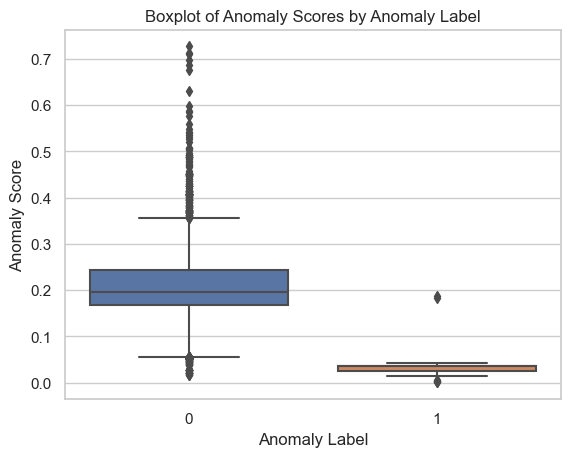

In [201]:
# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_valid, pd.DataFrame):
    y_valid = y_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores_autoencoder,
    'Anomaly_Label': y_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='Anomaly_Label', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Label')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Label')

# Show the plot
plt.show()

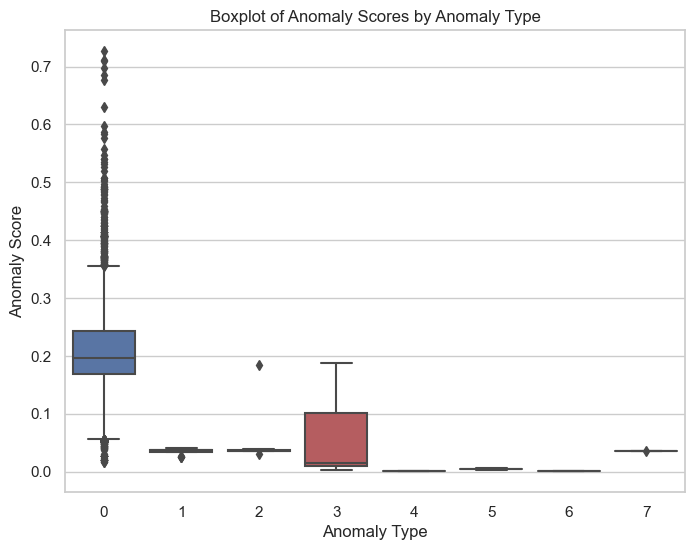

In [202]:
# Convert y_valid to a pandas Series if it's a DataFrame column
if isinstance(y_type_valid, pd.DataFrame):
    y_type_valid = y_type_valid.iloc[:, 0]

# Create a dataframe for plotting
data = {
    'Anomaly_Score': anomaly_scores_autoencoder,
    'Anomaly_Type': y_type_valid,
}
df2 = pd.DataFrame(data)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Anomaly_Type', y='Anomaly_Score', data=df2)

# Add labels and title
plt.xlabel('Anomaly Type')
plt.ylabel('Anomaly Score')
plt.title('Boxplot of Anomaly Scores by Anomaly Type')

# Show the plot
plt.show()

In [203]:
pickle_out1 = open('autoencoder.pkl', 'wb')
pickle.dump(autoencoder, pickle_out1)
pickle_out1.close()

In [204]:
pickle_out2 = open('scaler.pkl', 'wb')
pickle.dump(scaler, pickle_out2)
pickle_out2.close()